# Explicación relacionada a la base de datos

## Características del Conjunto de Datos

### Información Básica de la Canción:
- track_name: Nombre de la canción.
- artist(s)_name: Nombre del artista o artistas que interpretan la canción.
- artist_count: Número de artistas que contribuyen a la canción.
- released_year, released_month, released_day: Detalles de la fecha de lanzamiento.

### Métricas de Streaming:
- in_spotify_playlists: Número de listas de reproducción de Spotify en las que se incluye la canción.
- in_spotify_charts: Rango de la canción en las listas de éxitos de Spotify.
- streams: Número total de reproducciones en Spotify.
- in_apple_playlists, in_apple_charts: Presencia en listas de reproducción y listas de éxitos de Apple Music.
- in_deezer_playlists, in_deezer_charts: Presencia en listas de reproducción y listas de éxitos de Deezer.
- in_shazam_charts: Rango en las listas de éxitos de Shazam.
Atributos Musicales:
- bpm: Tiempo por minuto, que representa el ritmo de la canción.
- key: Tono de la canción.
- mode: Indica si la canción está en modo mayor o menor.
- danceability_%: Aptitud de la canción para bailar.
- valence_%: Positividad del contenido musical de la canción.
- energy_%: Nivel de energía percibida de la canción.
- acousticness_%: Presencia de sonido acústico en la canción.
- instrumentalness_%: Proporción de contenido instrumental en la pista.
- liveness_%: Presencia de elementos de actuación en vivo.
- speechiness_%: Cantidad de palabras habladas en la canción.


# Instalación y carga de librerias

In [39]:
%pip install missingno
%pip install sweetviz


Note: you may need to restart the kernel to use updated packages.


## librerias

In [40]:
import pandas as pd    # Manipulación y análisis de datos
import numpy as np     # Cálculo numérico
import matplotlib.pyplot as plt  # Visualización de datos
import seaborn as sns  # Visualización de datos
import missingno as msno  # Visualización de valores faltantes
import sweetviz as sw  # Visualización de datos y análisis exploratorio (EDA)

## Funciones

In [41]:
#  Cargamos la función para ver la composición de los datos
def analizar_columnas(df):
  """
  Analiza las columnas de un DataFrame y devuelve información estadística.

  Parámetros:
    df(DataFrame): El DataFrame a analizar.
  Retorno:
    df(DataFrame): El DataFrame con la información de composición de la base de datos. #Un DataFrame con la información estadística de cada columna.

  Ejemplo:
    df_analizado = analizar_columnas(df)
    print(df_analizado)
  """
  info = []
  for columna in df.columns:
    unicos = df[columna].nunique()
    nulos = df[columna].isnull().sum()
    total = len(df)
    porcentaje_nulos = (nulos / total) * 100
    info.append({
      'Columna': columna,
      'Cantidad de registros': total,
      'Únicos': unicos,
      'Cantidad de nulos': nulos,
      'Porcentaje de nulos': porcentaje_nulos,
      'Registros relacionados con nulos': total - nulos
    })
  return pd.DataFrame(info)


# Carga de base de datos y composición

In [ ]:
# Carga de datos de la base de datos
path = '../data/'
spotify_df = pd.read_csv(path + 'spotify-2023.csv', sep=',', encoding='latin-1')

## Visualización de los datos

In [5]:
# Mostrar las primeras filas del archivo para ver cómo están organizados los datos
print("Primeras 5 filas de los datos de Spotify:")
spotify_df.head(5)


Primeras 5 filas de los datos de Spotify:


track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

In [7]:
# Visualización de las columnas del DataFrame
spotify_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [8]:
# @title Visualización de composición de la base de datos.
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    object
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    int64 
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    object


In [ ]:
#  Verificar la forma de los datos
print(f"Forma de los datos (filas, columnas): {spotify_df.shape}")

Forma de los datos (filas, columnas): (952, 24)


In [ ]:
#  Verificar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(spotify_df.dtypes)


Tipos de datos por columna:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [12]:
#@title Contar los valores únicos por columna
print("\nValores únicos por columna:")
print(spotify_df.nunique())



Valores únicos por columna:
track_name              942
artist(s)_name          644
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    878
in_spotify_charts        82
streams                 948
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64


In [ ]:
#Verificar si hay datos faltantes
print("\nDatos faltantes por columna:")
print(spotify_df.isnull().sum())



Datos faltantes por columna:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


## Composición de la base de datos

In [14]:
# @title Verificación de los campos con relación a la composición de la base de dato almacenada en formato CSV
df_analizado = analizar_columnas(spotify_df)
df_analizado

Columna  Cantidad de registros  Únicos  Cantidad de nulos  \
0             track_name                    952     942                  0   
1         artist(s)_name                    952     644                  0   
2           artist_count                    952       8                  0   
3          released_year                    952      50                  0   
4         released_month                    952      12                  0   
5           released_day                    952      31                  0   
6   in_spotify_playlists                    952     878                  0   
7      in_spotify_charts                    952      82                  0   
8                streams                    952     948                  0   
9     in_apple_playlists                    952     234                  0   
10       in_apple_charts                    952     172                  0   
11   in_deezer_playlists                    952     348                  0   
12      in_deezer_charts                    952      34                  0   
13      in_shazam_charts                    952     198                 50   
14                   bpm                    952     124                  0   
15                   key                    952      11                 95   
16                  mode                    952       2                  0   
17        danceability_%                    952      72                  0   
18             valence_%                    952      94                  0   
19              energy_%                    952      80                  0   
20        acousticness_%                    952      98                  0   
21    instrumentalness_%                    952      39                  0   
22            liveness_%                    952      68                  0   
23         speechiness_%                    952      48                  0   

    Porcentaje de nulos  Registros relacionados con nulos  
0              0.000000                               952  
1              0.000000                               952  
2              0.000000                               952  
3              0.000000                               952  
4              0.000000                               952  
5              0.000000                               952  
6              0.000000                               952  
7              0.000000                               952  
8              0.000000                               952  
9              0.000000                               952  
10             0.000000                               952  
11             0.000000                               952  
12             0.000000                               952  
13             5.252101                               902  
14             0.000000                               952  
15             9.978992                               857  
16             0.000000                               952  
17             0.000000                               952  
18             0.000000                               952  
19             0.000000                               952  
20             0.000000                               952  
21             0.000000                               952  
22             0.000000                               952  
23             0.000000                               952

### Visuallización de vacios

<Axes: >

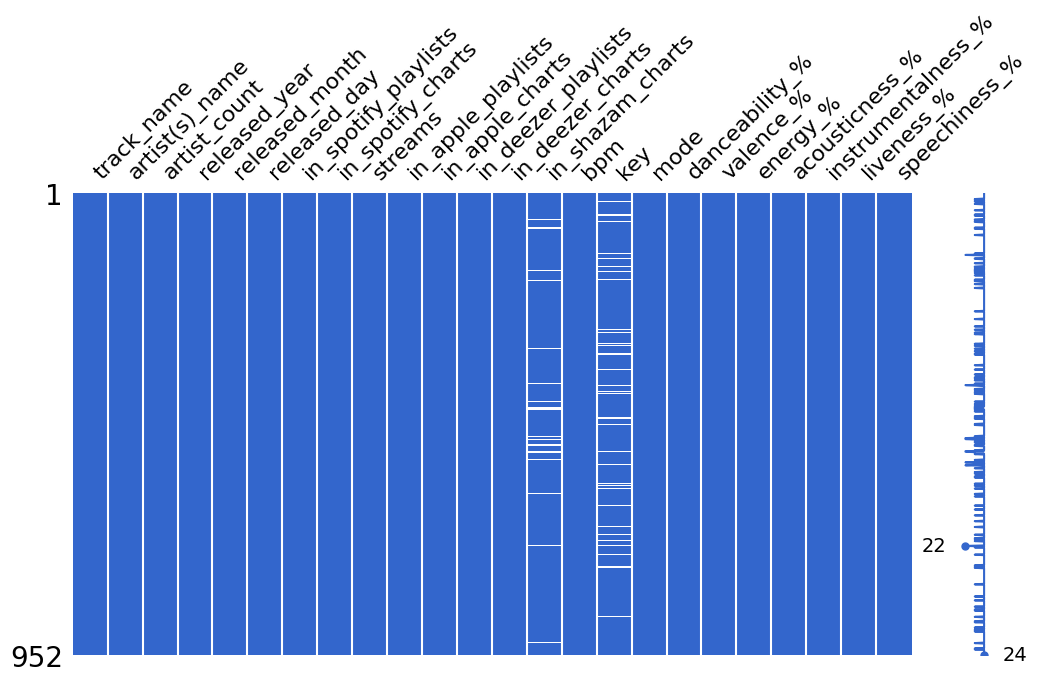

In [15]:
msno.matrix(spotify_df, figsize=(12, 6), color=(0.2, 0.4, 0.8))

### Descriptiva o distribución estadística de los datos númericos

In [ ]:
# Realizamos la descriptiva estadística
spotify_df.describe()

artist_count  released_year  released_month  released_day  \
count    952.000000     952.000000      952.000000    952.000000   
mean       1.556723    2018.288866        6.038866     13.944328   
std        0.893331      11.011397        3.564571      9.197223   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            952.000000         952.000000          952.000000   
mean            5202.565126          12.022059           67.866597   
std             7901.400683          19.582405           86.470591   
min               31.000000           0.000000            0.000000   
25%              874.500000           0.000000           13.000000   
50%             2216.500000           3.000000           34.000000   
75%             5573.750000          16.000000           88.000000   
max            52898.000000         147.000000          672.000000   

       in_apple_charts  in_deezer_playlists  in_deezer_charts         bpm  \
count       952.000000           952.000000        952.000000  952.000000   
mean         51.963235           385.535714          2.669118  122.553571   
std          50.628850          1131.078760          6.038152   28.069601   
min           0.000000             0.000000          0.000000   65.000000   
25%           7.000000            13.000000          0.000000   99.750000   
50%          38.500000            44.000000          0.000000  121.000000   
75%          87.000000           164.250000          2.000000  140.250000   
max         275.000000         12367.000000         58.000000  206.000000   

       danceability_%   valence_%    energy_%  acousticness_%  \
count      952.000000  952.000000  952.000000      952.000000   
mean        66.984244   51.406513   64.274160       27.078782   
std         14.631282   23.480526   16.558517       26.001599   
min         23.000000    4.000000    9.000000        0.000000   
25%         57.000000   32.000000   53.000000        6.000000   
50%         69.000000   51.000000   66.000000       18.000000   
75%         78.000000   70.000000   77.000000       43.000000   
max         96.000000   97.000000   97.000000       97.000000   

       instrumentalness_%  liveness_%  speechiness_%  
count          952.000000  952.000000     952.000000  
mean             1.582983   18.214286      10.138655  
std              8.414064   13.718374       9.915399  
min              0.000000    3.000000       2.000000  
25%              0.000000   10.000000       4.000000  
50%              0.000000   12.000000       6.000000  
75%              0.000000   24.000000      11.000000  
max             91.000000   97.000000      64.000000

# Visualización de distribuciones de las columnas en la base de datos

In [ ]:
#  Visualización de cantidad de canciones por artista
spotify_df['artist(s)_name'].value_counts(ascending=False)

artist(s)_name
Taylor Swift                                                34
The Weeknd                                                  22
SZA                                                         19
Bad Bunny                                                   19
Harry Styles                                                17
                                                            ..
Southstar                                                    1
Fran C, Polima WestCoast, Nickoog Clk, Pablito Pesadilla     1
Marshmello, Juice WRLD                                       1
Lil Yachty                                                   1
Ovy On The Drums, Quevedo                                    1
Name: count, Length: 644, dtype: int64

In [ ]:
#  seleccionamos los 10 primeros
Cantidad_de_artistas = 20
spotify_df['artist(s)_name'].value_counts(ascending=False).iloc[:Cantidad_de_artistas]


artist(s)_name
Taylor Swift        34
The Weeknd          22
SZA                 19
Bad Bunny           19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
Drake, 21 Savage     8
Feid                 8
BTS                  8
Labrinth             7
Olivia Rodrigo       7
NewJeans             6
Doja Cat             6
Billie Eilish        5
Mï¿½ï¿½ne            4
Adele                4
Drake                4
Eminem               4
Name: count, dtype: int64

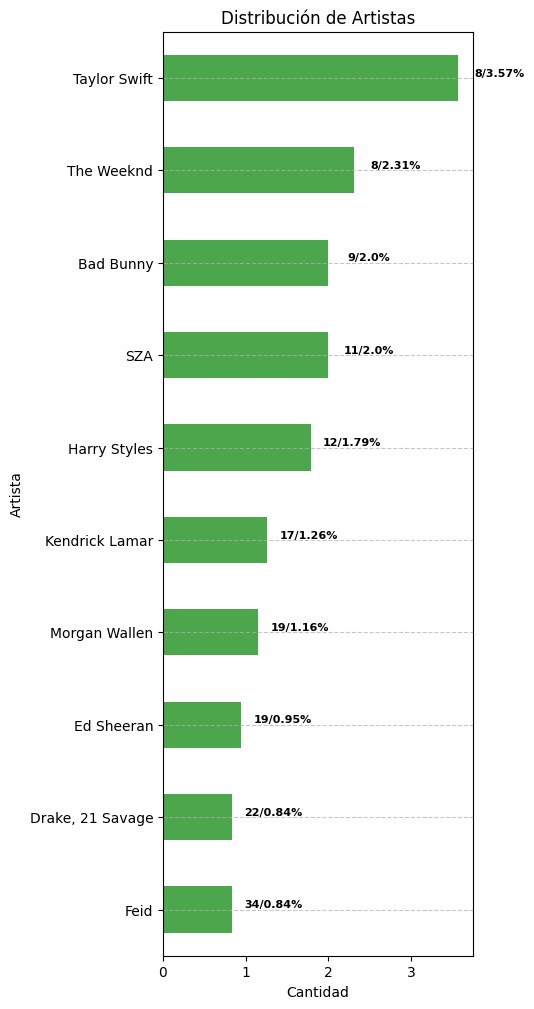

In [ ]:
#  3.1 Histograma de la Popularidad
# Crear el gráfico Histograma seleccionando los 10 primeros artistas
Cantidad_de_artistas = 10
counts = spotify_df['artist(s)_name'].value_counts().iloc[:Cantidad_de_artistas]
percentages = (spotify_df['artist(s)_name'].value_counts(normalize=True) * 100).iloc[:Cantidad_de_artistas].sort_values()

ax = percentages.plot(kind='barh', figsize=(4, 12), color='green', alpha=0.7)

# Agregar los valores absolutos encima de cada barra
for i, count in enumerate(counts):
    ax.text(percentages.iloc[i]+0.5, i, str(count)+'/'+str(percentages.iloc[i].round(2))+'%', ha='center', va='bottom', fontsize=8, fontweight='bold')

# Agregar título y etiquetas
plt.title('Distribución de Artistas')
plt.xlabel('Cantidad')
plt.ylabel('Artista')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Mostrar el gráfico
plt.show()

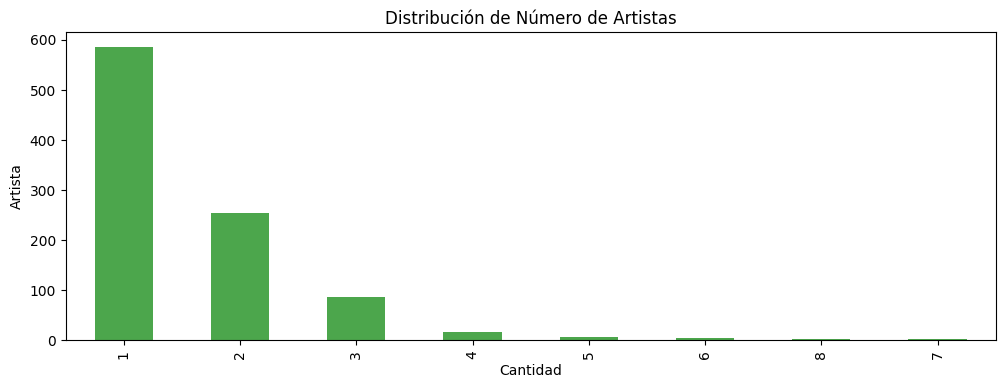

In [ ]:
# 3.1 Histograma de la Popularidad
# Crear el gráfico Histograma seleccionando los 10 primeros artistas
# Cantidad_de_artistas = 20
spotify_df['artist_count'].value_counts().plot(kind='bar', figsize=(12, 4), color='green', alpha=0.7)

# Agregar título y etiquetas
plt.title('Distribución de Número de Artistas')
plt.xlabel('Cantidad')
plt.ylabel('Artista')

# Mostrar el gráfico
plt.show()

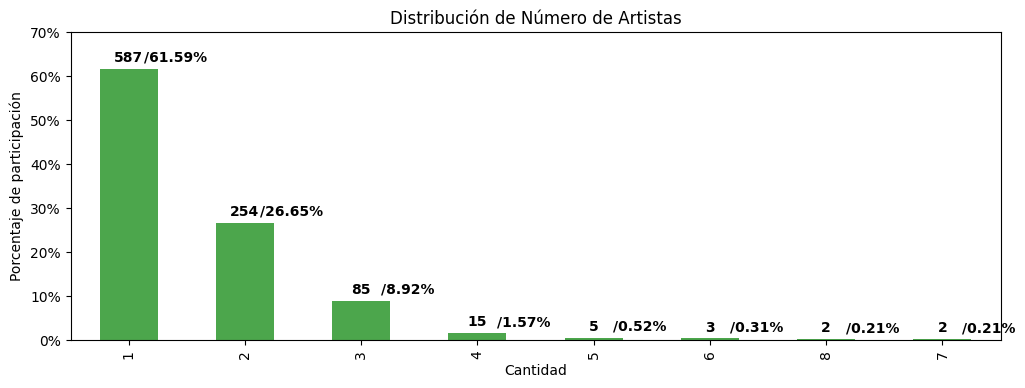

In [ ]:
# Calcular valores absolutos y porcentajes
counts = spotify_df['artist_count'].value_counts()
percentages = spotify_df['artist_count'].value_counts(normalize=True) * 100

# Crear el gráfico
ax = percentages.plot(kind='bar', figsize=(12, 4), color='green', alpha=0.7)

# Agregar los valores absolutos encima de cada barra
for i, count in enumerate(counts):
    ax.text(i, percentages.iloc[i] + 1, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')
    ax.text(i+0.4, percentages.iloc[i] + 1, '/'+str(percentages.iloc[i].round(2))+'%', ha='center', va='bottom', fontsize=10, fontweight='bold')


# Agregar título y etiquetas
plt.yticks(ticks=np.arange(0, 71, 10), labels=[f'{i}%' for i in range(0, 71, 10)])
plt.title('Distribución de Número de Artistas')
plt.xlabel('Cantidad')
plt.ylabel('Porcentaje de participación')

# Mostrar el gráfico
plt.show()


In [ ]:
spotify_df.released_year

0      2023
1      2023
2      2023
3      2019
4      2023
       ... 
948    2022
949    2022
950    2022
951    2022
952    2022
Name: released_year, Length: 953, dtype: int64

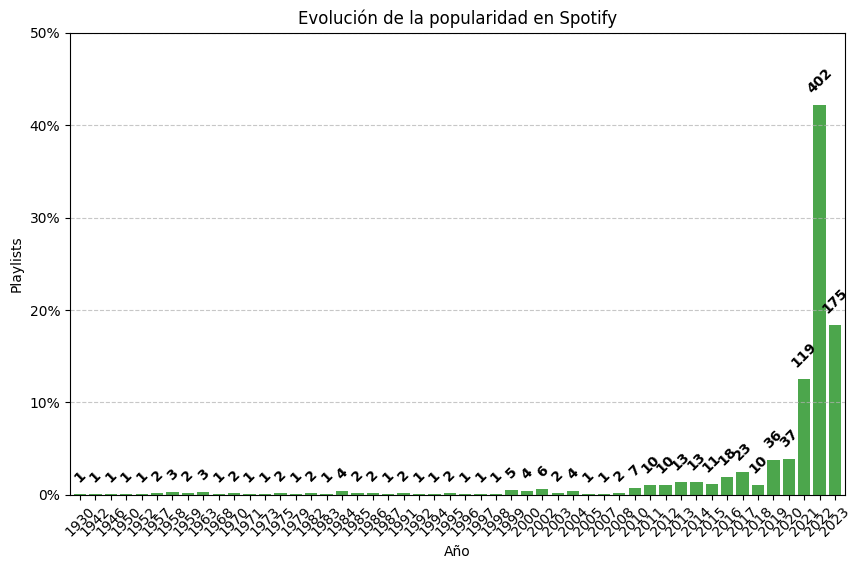

In [ ]:
#Evolución de publicaciones
plt.figure(figsize=(10, 6))
(spotify_df['released_year'].value_counts().sort_index().div(spotify_df['released_year'].value_counts().sum())*100).plot(kind='bar', color='green', alpha=0.7, width=0.8)
# Agregar los valores absolutos encima de cada barra
for i, count in enumerate(spotify_df['released_year'].value_counts().sort_index()):
    plt.text(i, count/spotify_df['released_year'].value_counts().sum()*100 + 1, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=45)
    
plt.xticks(rotation=45)
plt.yticks(ticks=np.arange(0, 51, 10), labels=[f'{i}%' for i in range(0, 51, 10)])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Evolución de la popularidad en Spotify')
plt.xlabel('Año')
plt.ylabel('Playlists')
plt.show()


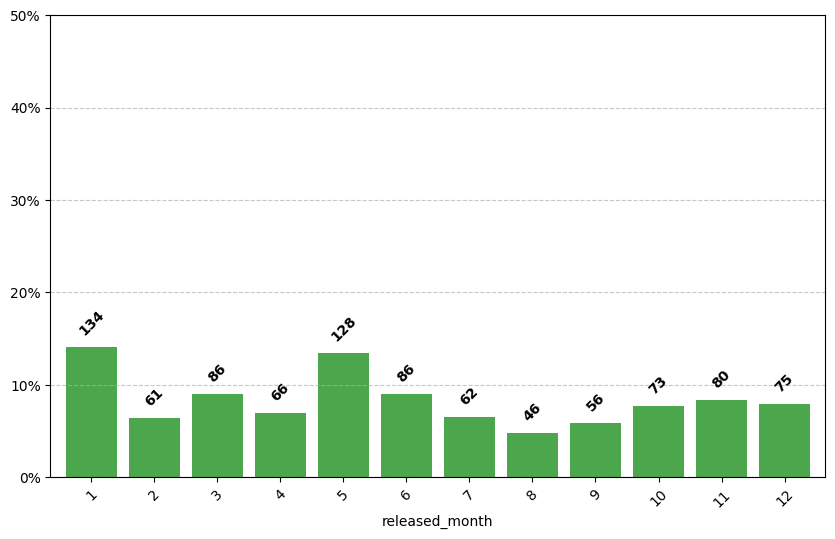

In [ ]:
#Evolución de publicaciones
plt.figure(figsize=(10, 6))
(spotify_df['released_month'].value_counts().sort_index().div(spotify_df['released_month'].value_counts().sum())*100).plot(kind='bar', color='green', alpha=0.7, width=0.8)
# Agregar los valores absolutos encima de cada barra
for i, count in enumerate(spotify_df['released_month'].value_counts().sort_index()):
    plt.text(i, count/spotify_df['released_month'].value_counts().sum()*100 + 1, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=45)
    
plt.xticks(rotation=45)
plt.yticks(ticks=np.arange(0, 51, 10), labels=[f'{i}%' for i in range(0, 51, 10)])
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.title('Evolución de la popularidad en Spotify')
# plt.xlabel('Año')
# plt.ylabel('Playlists')
plt.show()


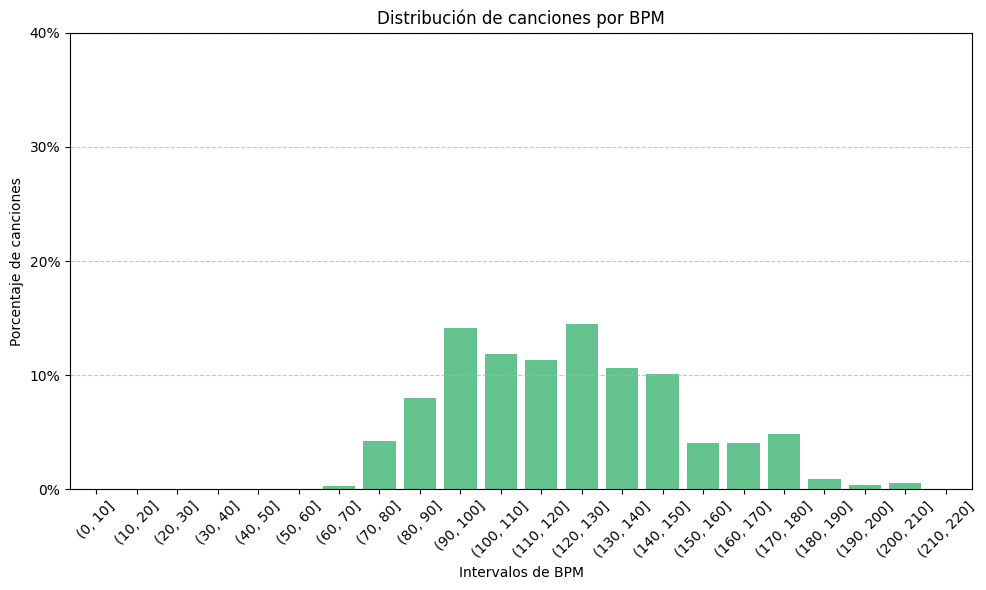

In [26]:
# Distribución de canciones por BPM (Beats Per Minute)
plt.figure(figsize=(10, 6))

# Agrupar los BPM en intervalos de 10 unidades
bpm_bins = pd.cut(spotify_df['bpm'], bins=range(0, 230, 10))  # Puedes ajustar el rango si tus BPM superan 230
bpm_counts = bpm_bins.value_counts().sort_index()
bpm_percentages = bpm_counts / bpm_counts.sum() * 100

# Gráfico de barras
bpm_percentages.plot(kind='bar', color='mediumseagreen', alpha=0.8, width=0.8)



# Estética del gráfico
plt.xticks(rotation=45)
plt.yticks(ticks=np.arange(0, 41, 10), labels=[f'{i}%' for i in range(0, 41, 10)])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribución de canciones por BPM')
plt.xlabel('Intervalos de BPM')
plt.ylabel('Porcentaje de canciones')
plt.tight_layout()
plt.show()


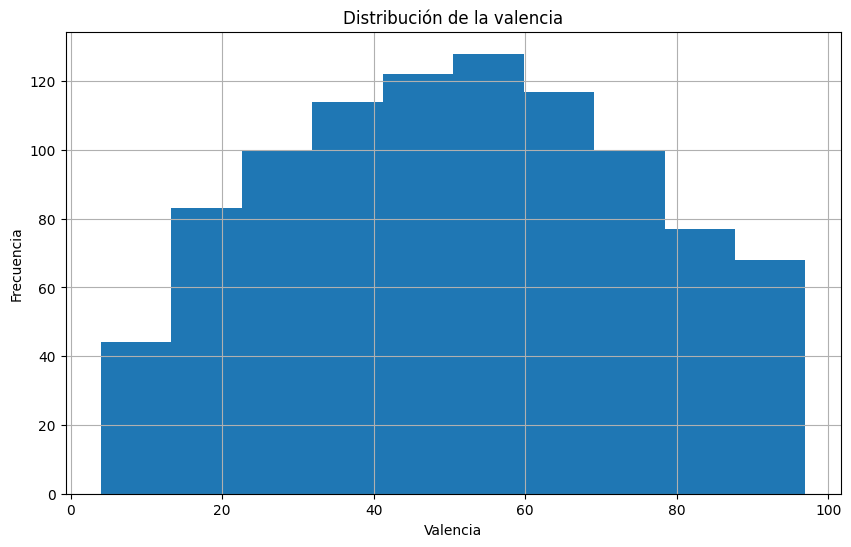

In [ ]:
#@title Distribución de la valencia
plt.figure(figsize=(10, 6))
spotify_df['valence_%'].hist()
plt.title('Distribución de la valencia')
plt.xlabel('Valencia')
plt.ylabel('Frecuencia')
plt.show()


# Visualización de la Relación entre columnas

## Comparativa de las columnas

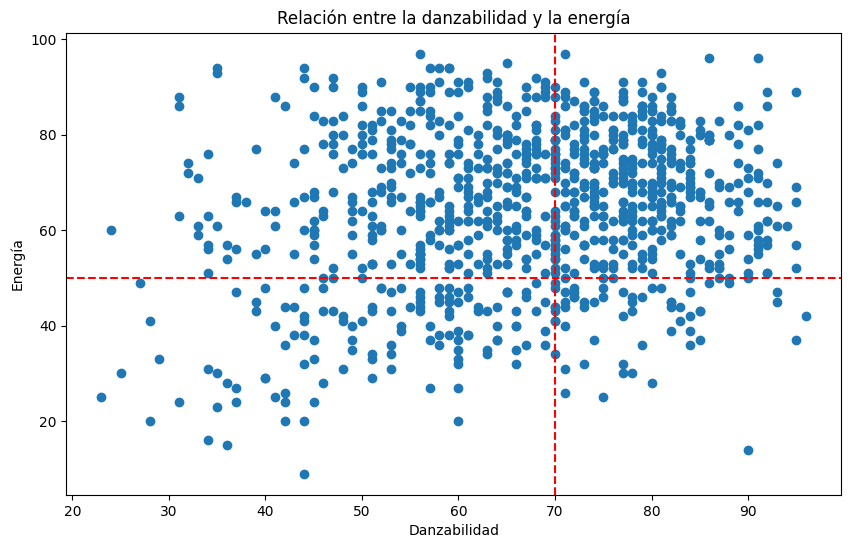

In [ ]:
plt.figure(figsize=(10, 6))

# Crear el scatter plot
plt.scatter(spotify_df['danceability_%'], spotify_df['energy_%'])

# Agregar líneas punteadas en rojo (en 0.5 para ambos ejes como referencia)
plt.axhline(y=50, color='red', linestyle='--')  # Línea horizontal
plt.axvline(x=70, color='red', linestyle='--')  # Línea vertical

# Títulos y etiquetas
plt.title('Relación entre la danzabilidad y la energía')
plt.xlabel('Danzabilidad')
plt.ylabel('Energía')

# Mostrar gráfico
plt.show()


C:\Users\frany\AppData\Local\Temp\ipykernel_22572\3086768566.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  spotify_df[spotify_df['energy_%']>50][spotify_df['danceability_%']>70]['artist(s)_name'].value_counts().head(10).plot(kind='barh', figsize=(12, 6), color='green', alpha=0.7)


<Axes: ylabel='artist(s)_name'>

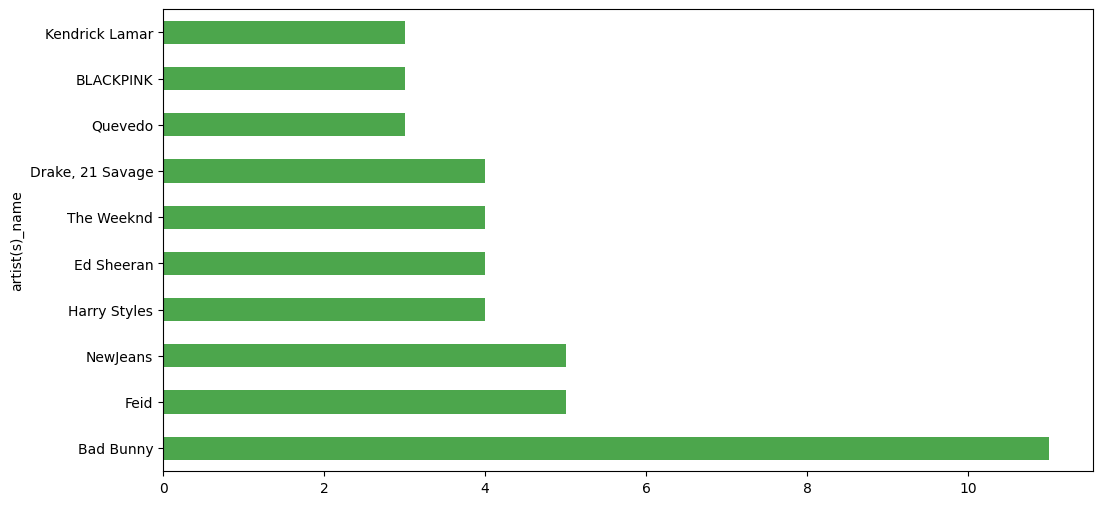

In [ ]:
spotify_df[spotify_df['energy_%']>50][spotify_df['danceability_%']>70]['artist(s)_name'].value_counts().head(10).plot(kind='barh', figsize=(12, 6), color='green', alpha=0.7)

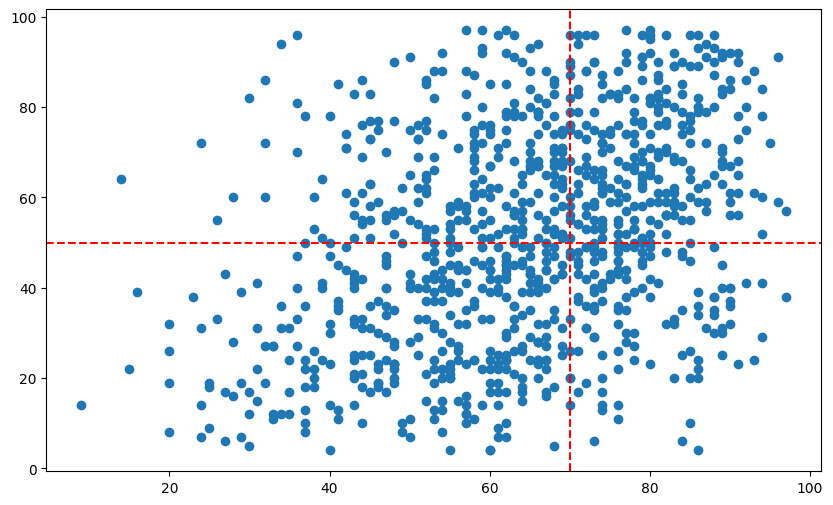

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Crear el scatter plot
plt.scatter(spotify_df['energy_%'], spotify_df['valence_%'])

# Agregar líneas punteadas en rojo (en 0.5 para ambos ejes como referencia)
plt.axhline(y=50, color='red', linestyle='--')  # Línea horizontal
plt.axvline(x=70, color='red', linestyle='--')  # Línea vertical

# Títulos y etiquetas
# plt.title('Relación entre la danzabilidad y la energía')
# plt.xlabel('Danzabilidad')
# plt.ylabel('Energía')

# Mostrar gráfico
plt.show()


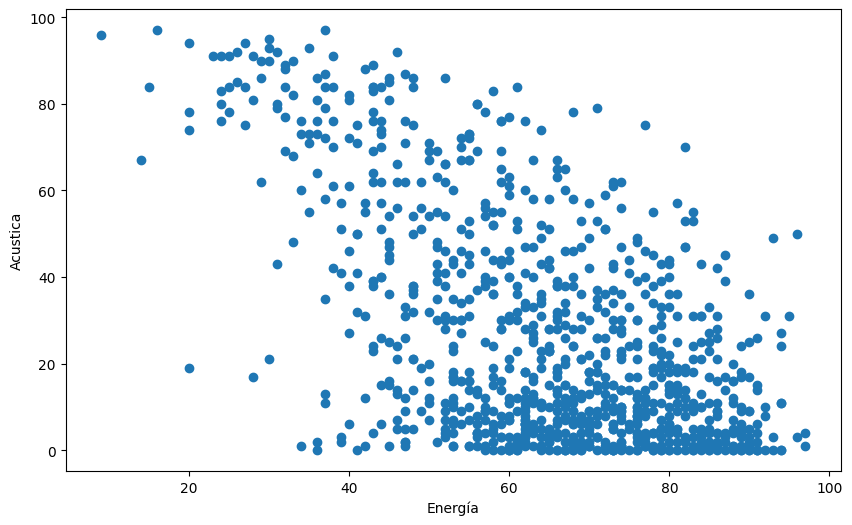

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Crear el scatter plot
plt.scatter(spotify_df['energy_%'], spotify_df['acousticness_%'])

# Agregar líneas punteadas en rojo (en 0.5 para ambos ejes como referencia)
# plt.axhline(y=50, color='red', linestyle='--')  # Línea horizontal
# plt.axvline(x=70, color='red', linestyle='--')  # Línea vertical

# Títulos y etiquetas
# plt.title('Relación entre la danzabilidad y la energía')
plt.ylabel('Acustica')
plt.xlabel('Energía')

# Mostrar gráfico
plt.show()


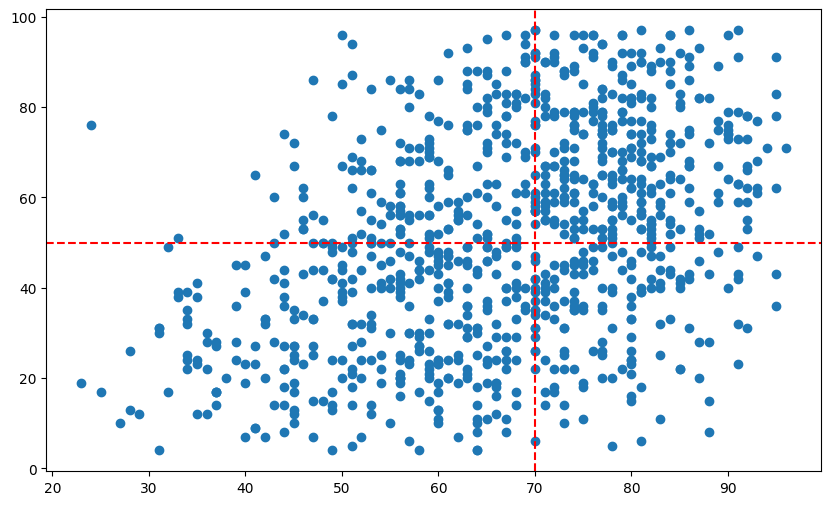

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Crear el scatter plot
plt.scatter(spotify_df['danceability_%'], spotify_df['valence_%'])

# Agregar líneas punteadas en rojo (en 0.5 para ambos ejes como referencia)
plt.axhline(y=50, color='red', linestyle='--')  # Línea horizontal
plt.axvline(x=70, color='red', linestyle='--')  # Línea vertical

# Títulos y etiquetas
# plt.title('Relación entre la danzabilidad y la energía')
# plt.xlabel('Danzabilidad')
# plt.ylabel('Energía')

# Mostrar gráfico
plt.show()


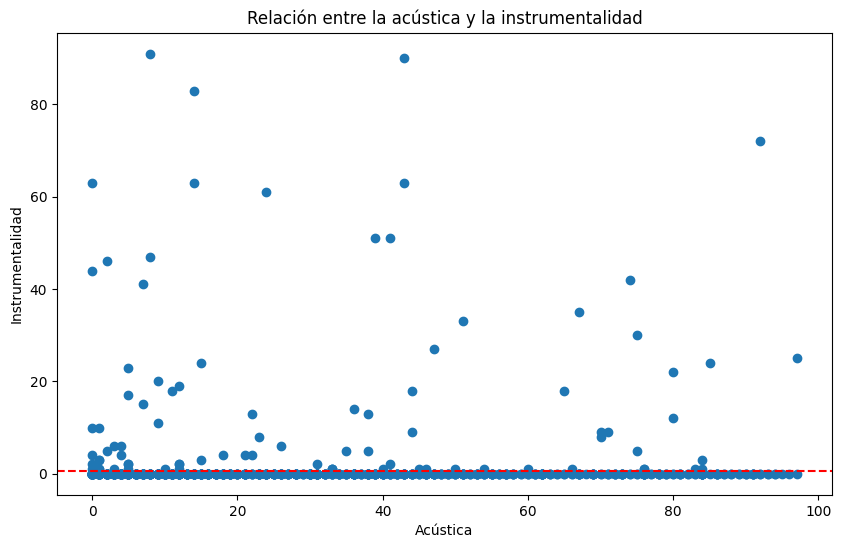

In [ ]:
#@title Relación entre la acústica y la instrumentalidad
plt.figure(figsize=(10, 6))
plt.scatter(spotify_df['acousticness_%'], spotify_df['instrumentalness_%'])
plt.title('Relación entre la acústica y la instrumentalidad')
plt.xlabel('Acústica')
plt.ylabel('Instrumentalidad')
plt.axhline(y=0.5, color='red', linestyle='--')  # Línea horizontal

plt.show()


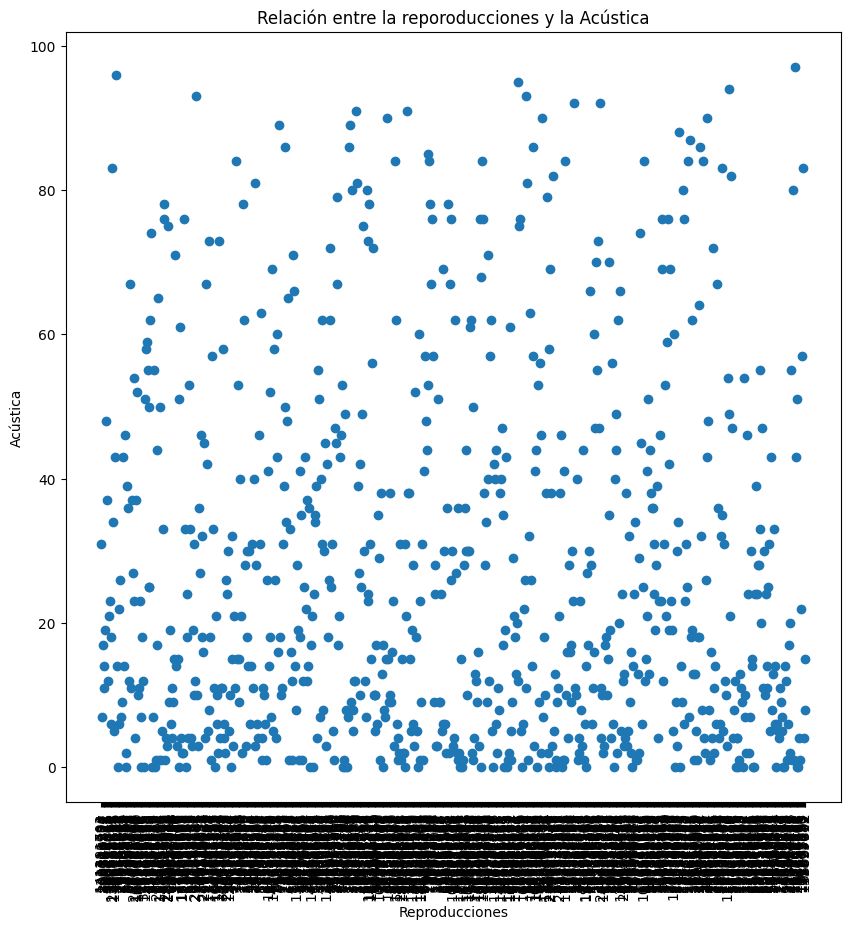

In [ ]:
#@title Relación entre la reproducciones y la Acústica
plt.figure(figsize=(10, 10))
plt.scatter(spotify_df['streams'][spotify_df['released_year']>2016], spotify_df['acousticness_%'][spotify_df['released_year']>2016])
plt.title('Relación entre la reporoducciones y la Acústica')
plt.ylabel('Acústica')
plt.xlabel('Reproducciones')
plt.xticks(rotation=90)
plt.show()


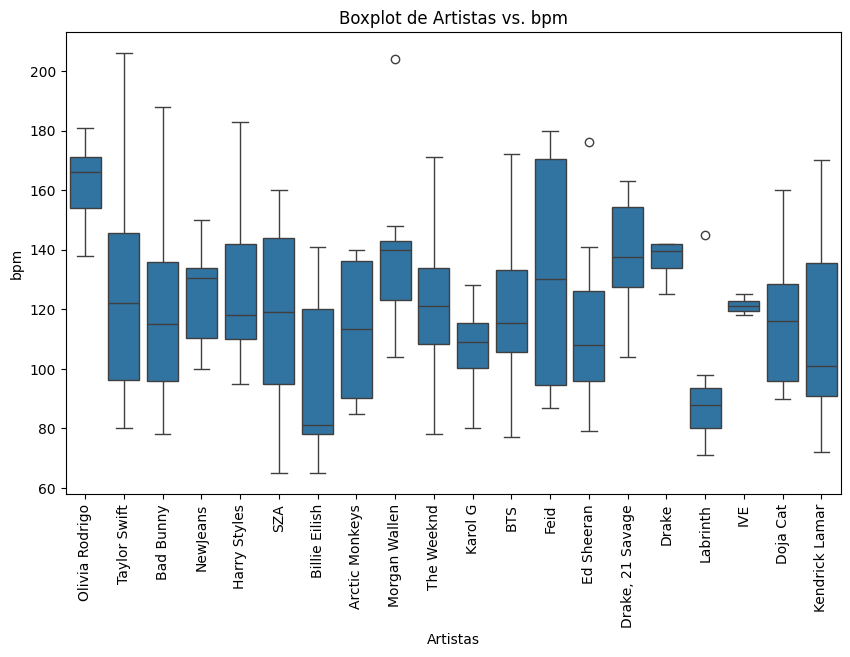

In [ ]:
# @title Grafica de Boxplot composición de la base de datos
plt.figure(figsize=(10, 6))
# Seleccionar los cantantes con mayor cantidad de canciones
Cantidad_de_artistas = 20
# Obtener los nombres de los artistas con más canciones
nombres_artistas = spotify_df['artist(s)_name'].value_counts().iloc[:Cantidad_de_artistas].index.tolist()

sns.boxplot(x='artist(s)_name', y='bpm', data=spotify_df[spotify_df['artist(s)_name'].isin(nombres_artistas)])
plt.title('Boxplot de Artistas vs. bpm')
plt.xlabel('Artistas')
plt.ylabel('bpm')
plt.xticks(rotation=90)
plt.show()


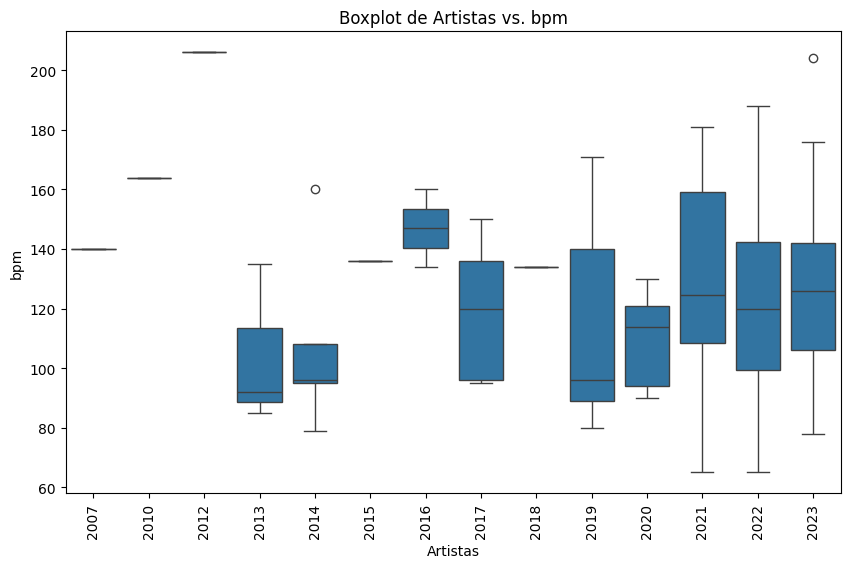

In [ ]:
# @title Grafica de Boxplot composición de la base de datos
plt.figure(figsize=(10, 6))
# Seleccionar los cantantes con mayor cantidad de canciones
Cantidad_de_artistas = 20
# Obtener los nombres de los artistas con más canciones
nombres_artistas = spotify_df['artist(s)_name'].value_counts().iloc[:Cantidad_de_artistas].index.tolist()

sns.boxplot(x='released_year', y='bpm', data=spotify_df[spotify_df['artist(s)_name'].isin(nombres_artistas)])
plt.title('Boxplot de Artistas vs. bpm')
plt.xlabel('Artistas')
plt.ylabel('bpm')
plt.xticks(rotation=90)
plt.show()


In [4]:
# Seleccionar las columnas numéricas
numeric_cols = spotify_df.select_dtypes(include=['number'])

In [5]:
numeric_cols

artist_count  released_year  released_month  released_day  \
0               2           2023               7            14   
1               1           2023               3            23   
2               1           2023               6            30   
3               1           2019               8            23   
4               1           2023               5            18   
..            ...            ...             ...           ...   
948             1           2022              11             3   
949             1           2022              10            21   
950             2           2022              11             3   
951             3           2022              10            20   
952             1           2022              11             4   

     in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
0                     553                147                  43   
1                    1474                 48                  48   
2                    1397                113                  94   
3                    7858                100                 116   
4                    3133                 50                  84   
..                    ...                ...                 ...   
948                   953                  0                  61   
949                  1180                  0                   4   
950                   573                  0                   2   
951                  1320                  0                  29   
952                   782                  2                  27   

     in_apple_charts  in_deezer_charts  bpm  danceability_%  valence_%  \
0                263                10  125              80         89   
1                126                14   92              71         61   
2                207                14  138              51         32   
3                207                12  170              55         58   
4                133                15  144              65         23   
..               ...               ...  ...             ...        ...   
948               13                 1  144              60         24   
949                0                 0  166              42          7   
950                0                 0   92              80         81   
951               26                 0   97              82         67   
952               18                 1   90              61         32   

     energy_%  acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
0          83              31                   0           8              4  
1          74               7                   0          10              4  
2          53              17                   0          31              6  
3          72              11                   0          11             15  
4          80              14                  63          11              6  
..        ...             ...                 ...         ...            ...  
948        39              57                   0           8              3  
949        24              83                   1          12              6  
950        67               4                   0           8              6  
951        77               8                   0          12              5  
952        67              15                   0          11              5  

[953 rows x 17 columns]

Resumen estadístico:

- count: número de valores no nulos 
- mean: media aritmética
- std: desviación estándar
- min: valor mínimo
- 25%: percentil 25 (cuartil inferior)
- 50%: percentil 50 (media)
- 75%: percentil 75 (cuartil superior)
- max: valor máximo


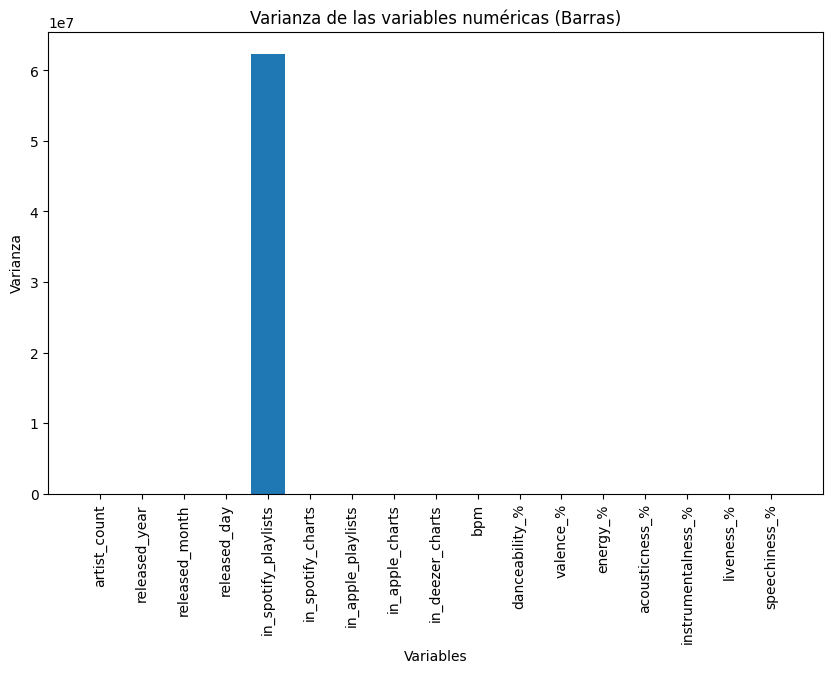

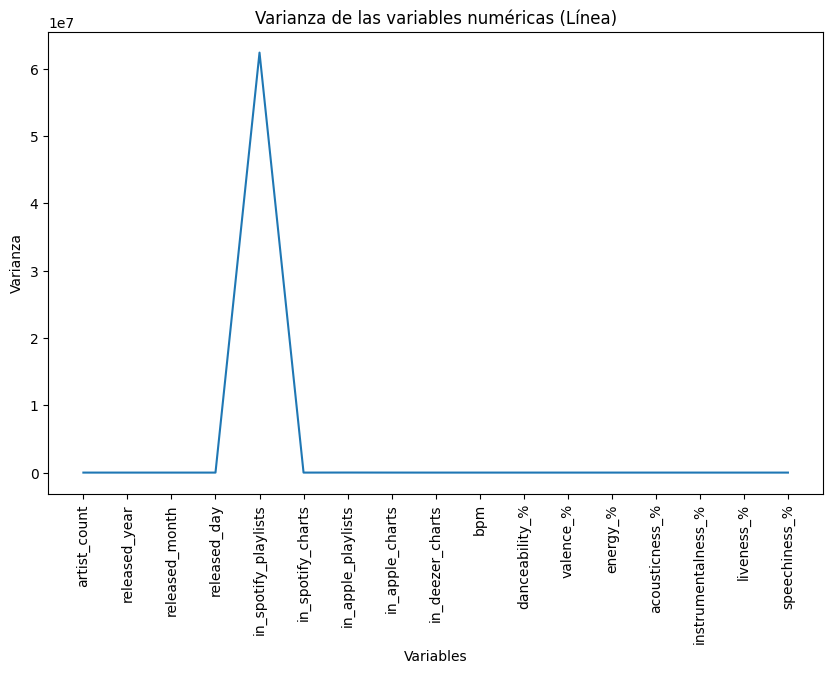

In [ ]:
#visualizar la varianza de las variables numericas con numeric_cols.var() en barras y en linea juntas

# Calcular la varianza de las columnas numéricas
variance = numeric_cols.var()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(variance.index, variance.values)
plt.title('Varianza de las variables numéricas (Barras)')
plt.xlabel('Variables')
plt.ylabel('Varianza')
plt.xticks(rotation=90)
plt.show()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(variance.index, variance.values)
plt.title('Varianza de las variables numéricas (Línea)')
plt.xlabel('Variables')
plt.ylabel('Varianza')
plt.xticks(rotation=90)
plt.show()


In [7]:
numeric_cols.loc[:, numeric_cols.var() > numeric_cols.var().quantile(0.75)]

in_spotify_playlists  in_apple_playlists  in_apple_charts  bpm
0                     553                  43              263  125
1                    1474                  48              126   92
2                    1397                  94              207  138
3                    7858                 116              207  170
4                    3133                  84              133  144
..                    ...                 ...              ...  ...
948                   953                  61               13  144
949                  1180                   4                0  166
950                   573                   2                0   92
951                  1320                  29               26   97
952                   782                  27               18   90

[953 rows x 4 columns]

<Figure size 2500x2500 with 0 Axes>

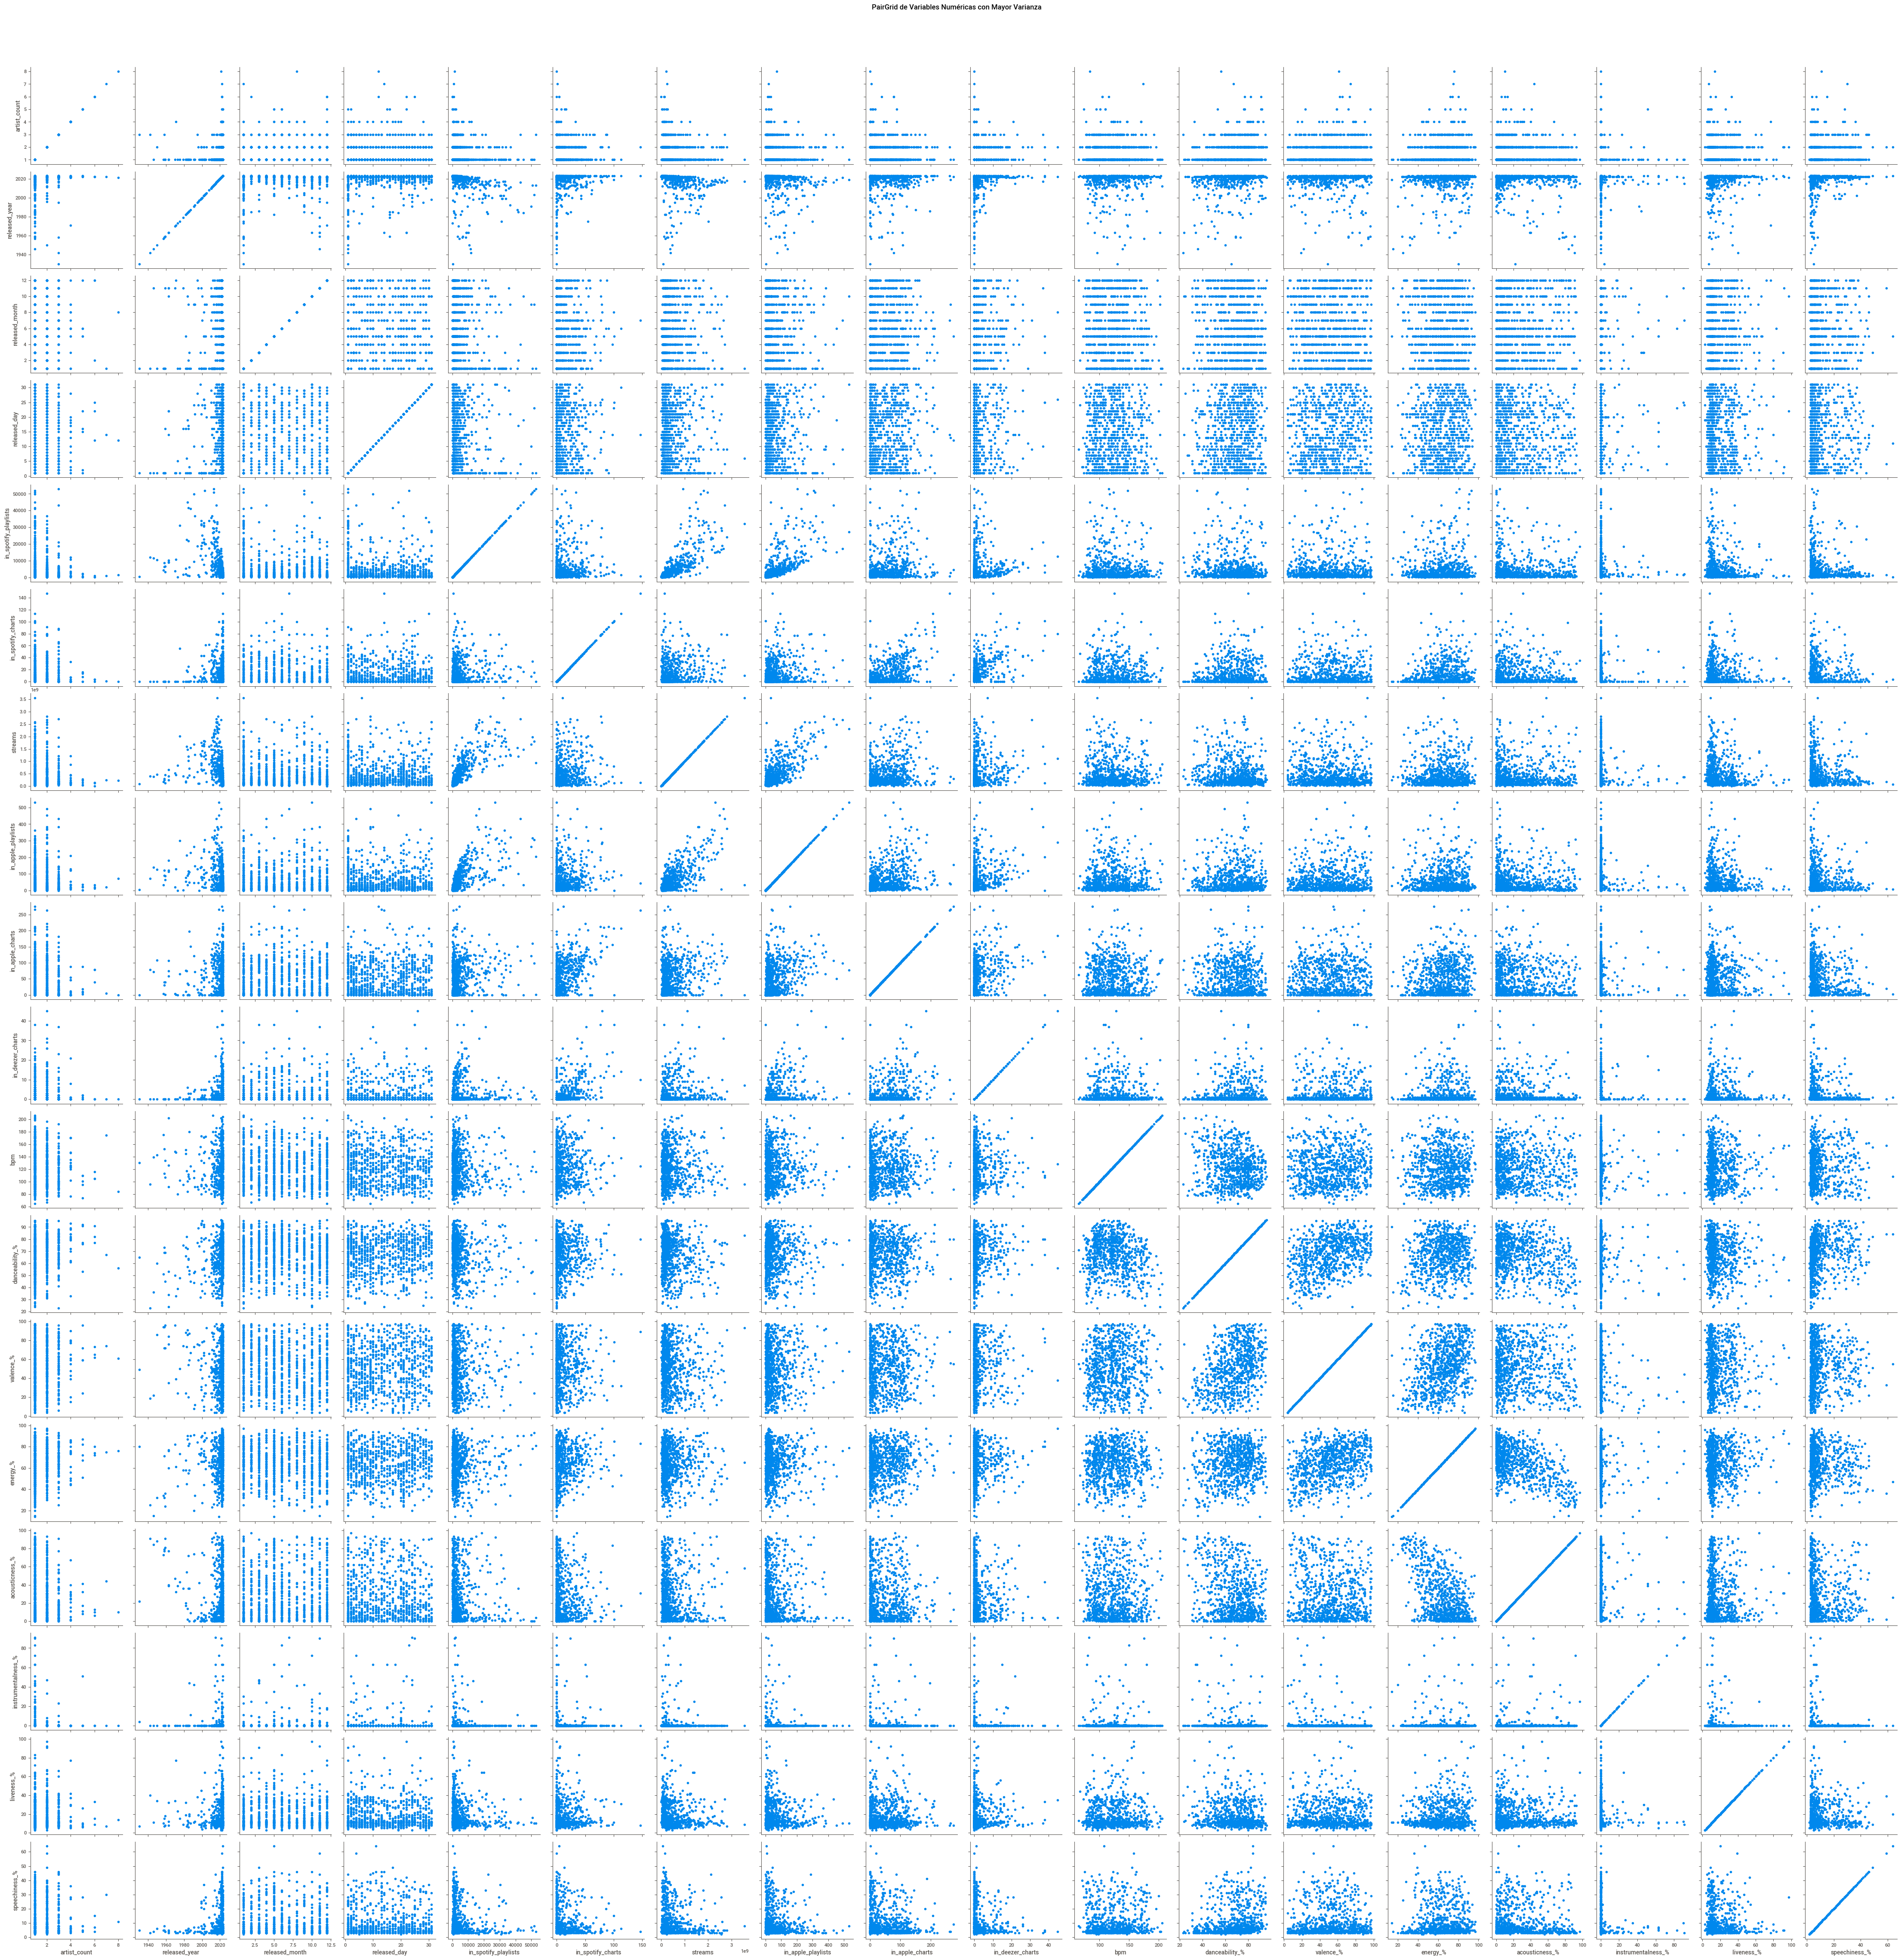

In [ ]:
# title Grafica
numeric_cols = spotify_df.select_dtypes(include=['number'])

# Seleccionar las columnas numéricas con mayor varianza
numeric_cols_high_variance = numeric_cols#.loc[:, numeric_cols.var() > numeric_cols.var().quantile(0.75)]

# Crear el PairGrid con Seaborn para las columnas seleccionadas
plt.figure(figsize=(25, 25))
g = sns.PairGrid(numeric_cols_high_variance)
g.map(plt.scatter)

plt.suptitle('PairGrid de Variables Numéricas con Mayor Varianza', y=1.02)
plt.show()


# Limpieza de datos

In [ ]:
# Verificar los valores únicos de la columna 'streams'
spotify_df['streams'].unique()

# spotify_df.drop_duplicates(subset=['track_name'], inplace=True)
# eliminar BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3
spotify_df = spotify_df[spotify_df['streams']!='BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']
# Garantizamos que la columna 'in_deezer_playlists' sea numérica
spotify_df['in_deezer_playlists'] = spotify_df['in_deezer_playlists'].str.replace(',', '', regex=False)
spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists'], errors='coerce')

In [38]:
953*0.09978992	

95.09979376

In [60]:
# Limpiar los datos eliminando filas con valores nulos
spotify_df_ = spotify_df.dropna()

In [70]:
(816/953)*100

85.62434417628542

<Axes: >

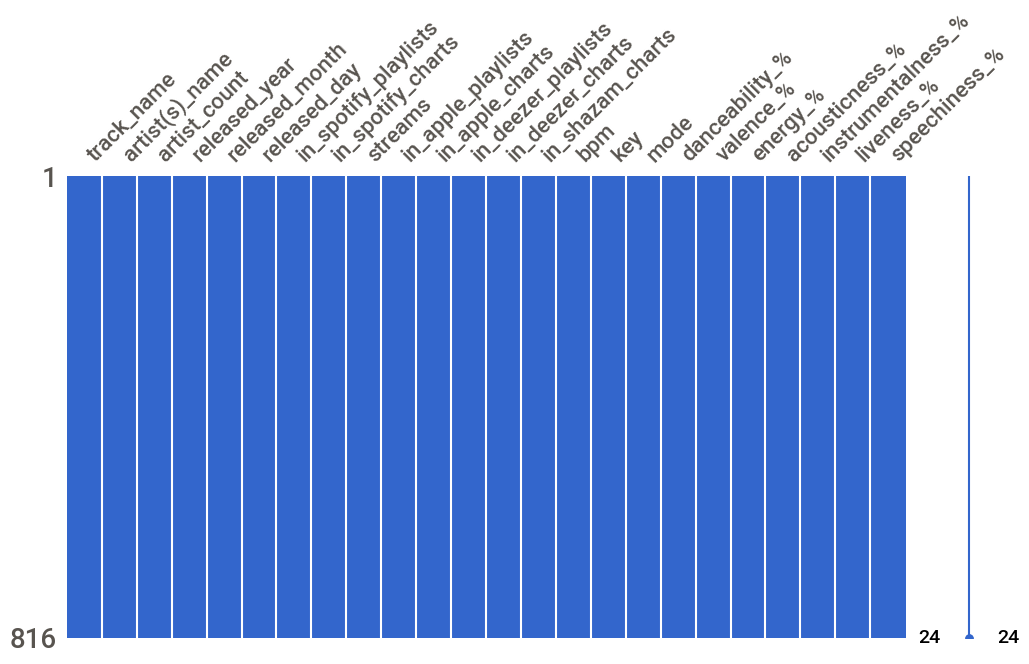

In [61]:
msno.matrix(spotify_df_, figsize=(12, 6), color=(0.2, 0.4, 0.8))

In [ ]:
# Verificar los tipos de datos de cada columna
for col in spotify_df_.columns:
    try :
        spotify_df_[col] = spotify_df_[col].astype(int)
    except:
        spotify_df_[col] = spotify_df_[col].astype(str)

C:\Users\frany\AppData\Local\Temp\ipykernel_15704\4150723525.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df_[col] = spotify_df_[col].astype(str)
C:\Users\frany\AppData\Local\Temp\ipykernel_15704\4150723525.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df_[col] = spotify_df_[col].astype(str)
C:\Users\frany\AppData\Local\Temp\ipykernel_15704\4150723525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [ ]:
# Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)


nombre = 'Spotify'
advert_report = sw.analyze([spotify_df_, nombre]) # Realizamos el análisis de la base de datos inicial

# Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df_spotify.html')


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df_spotify.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



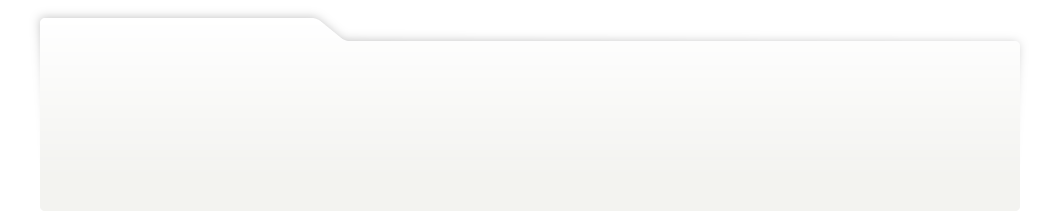
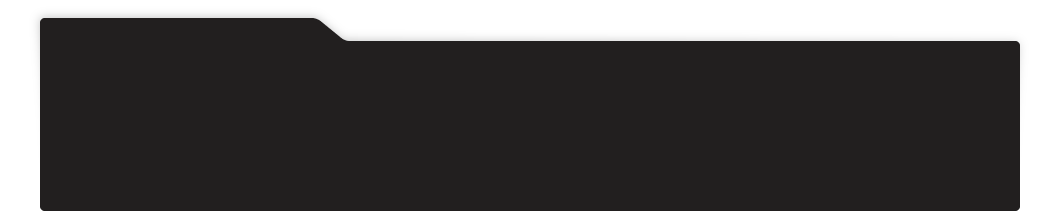
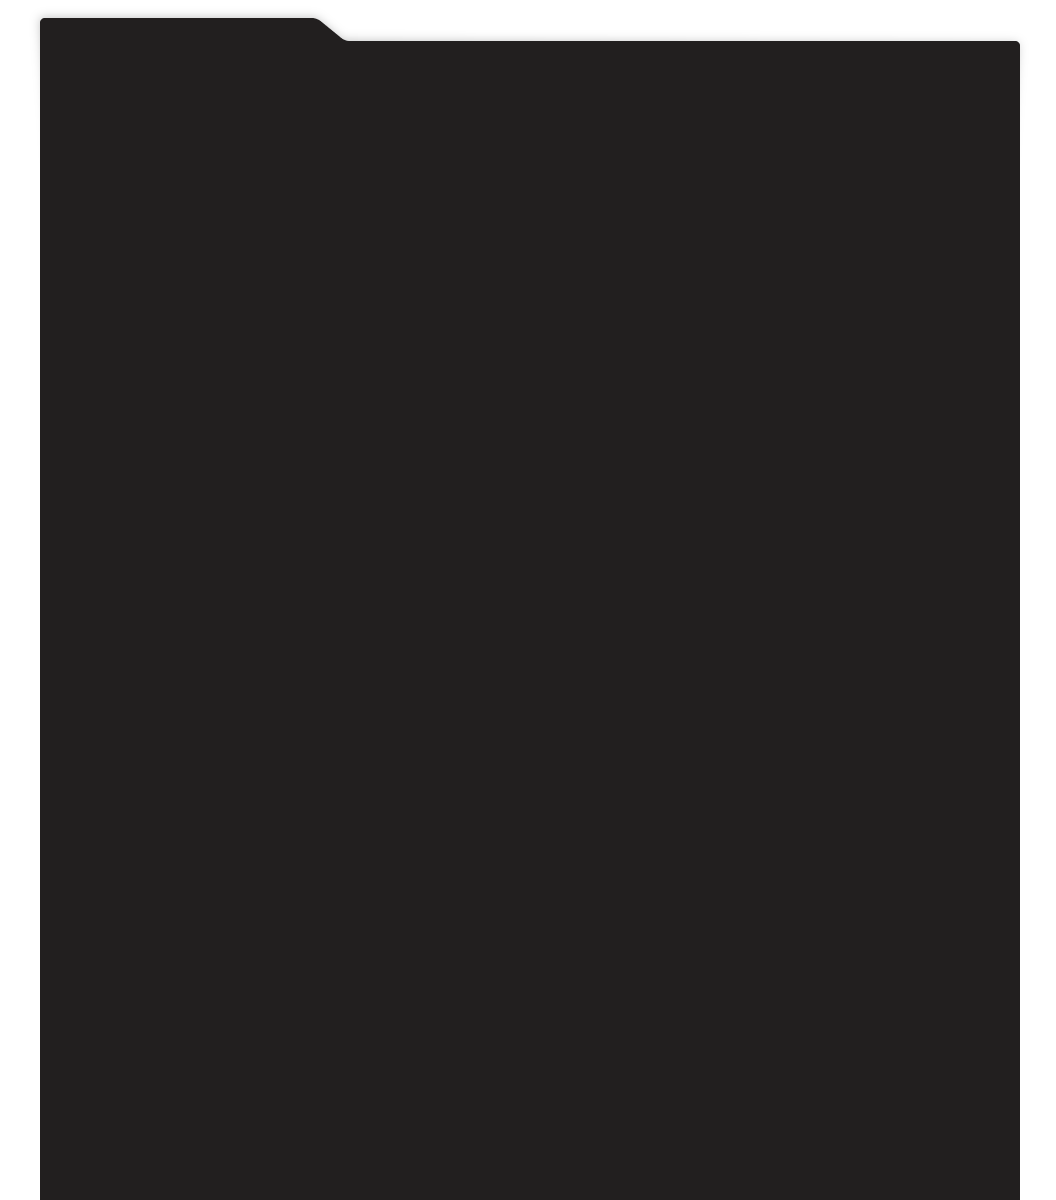
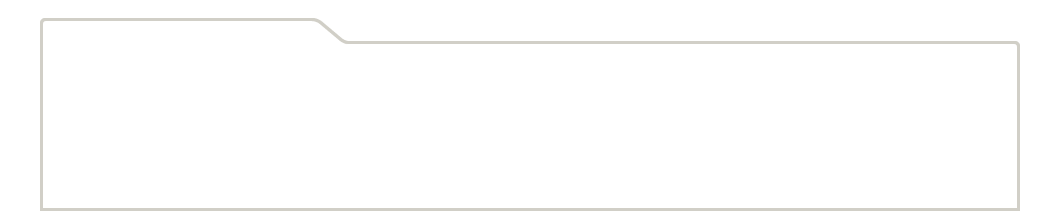
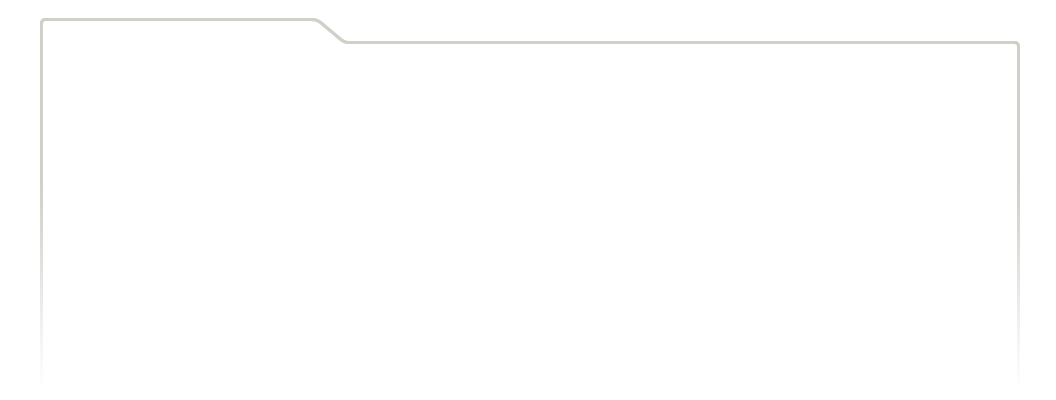
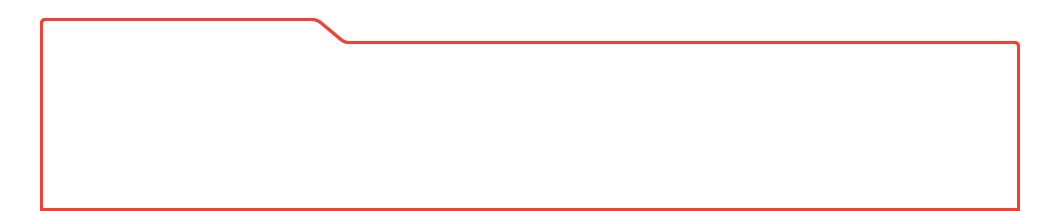
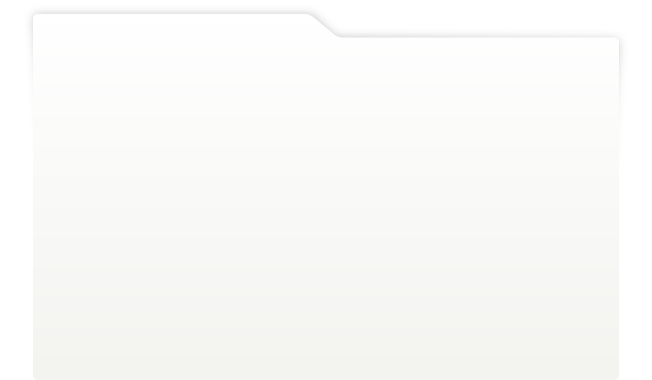
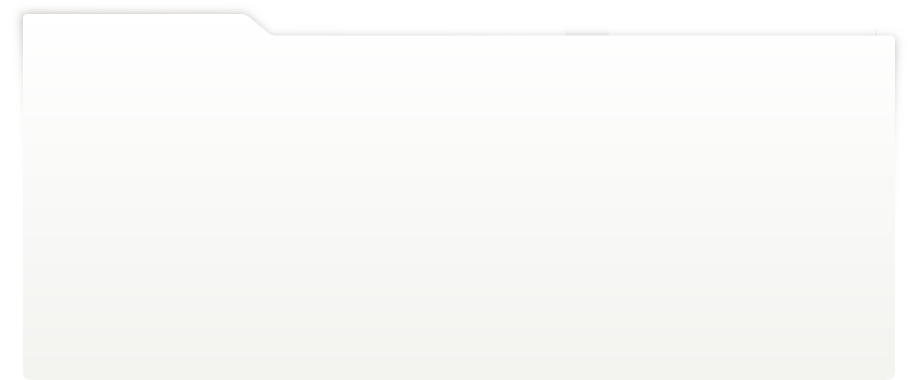
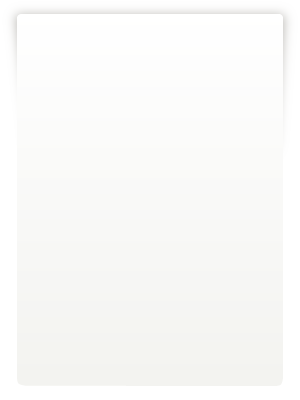
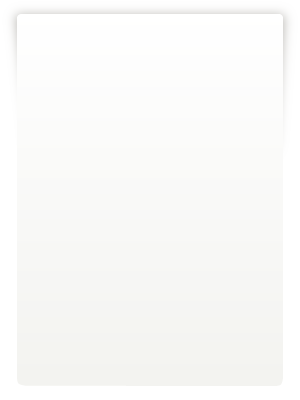
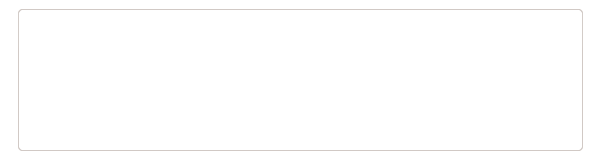
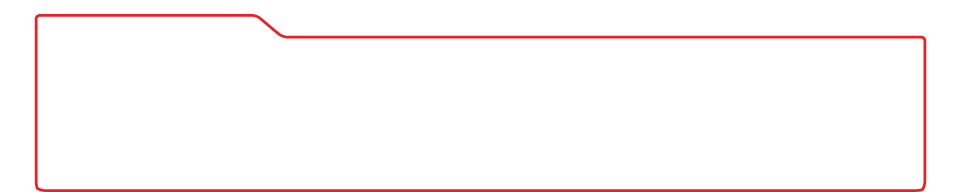
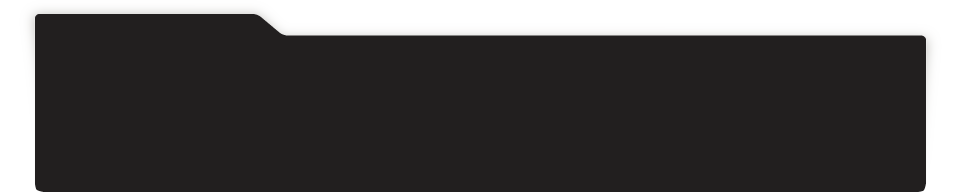
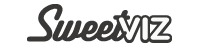
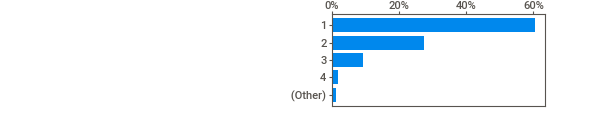
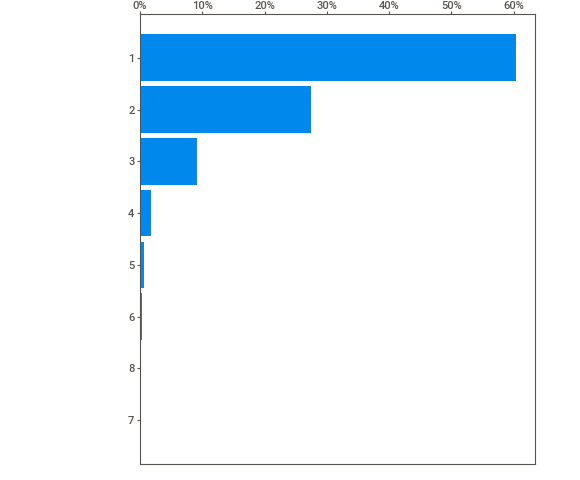
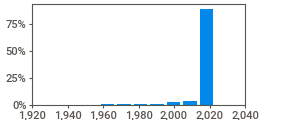
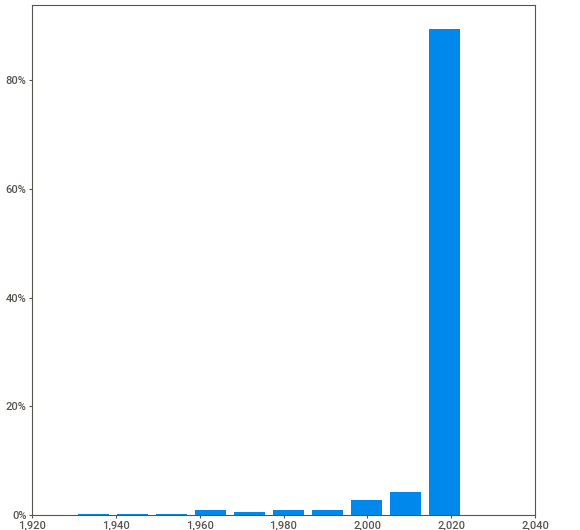
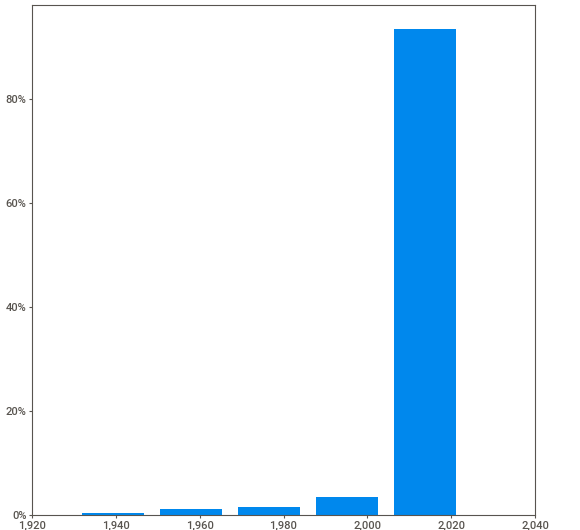
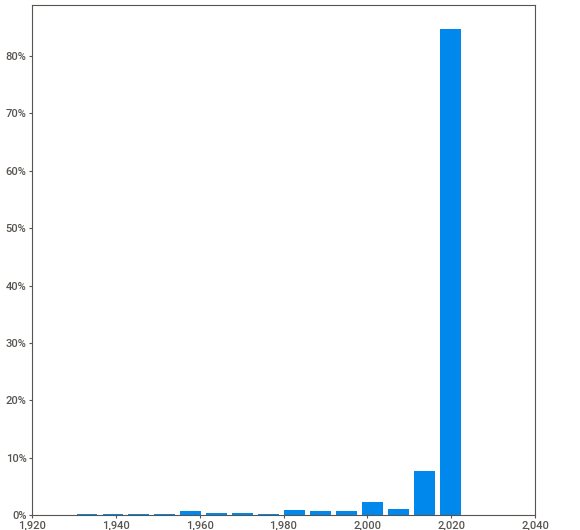
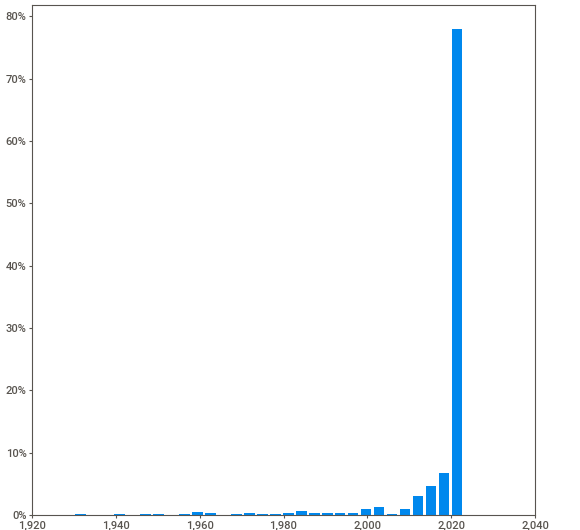
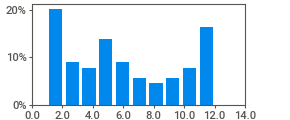
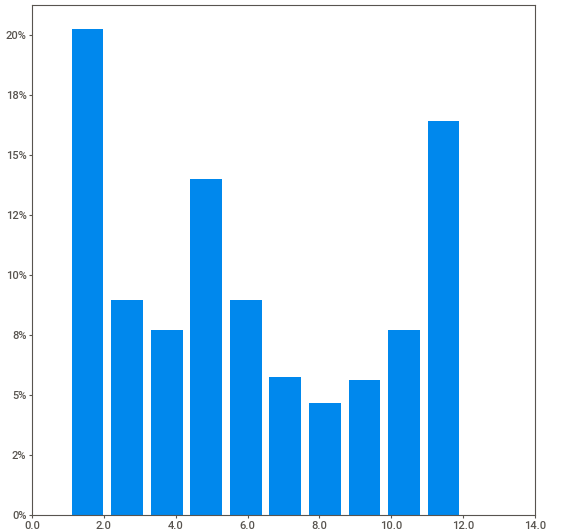
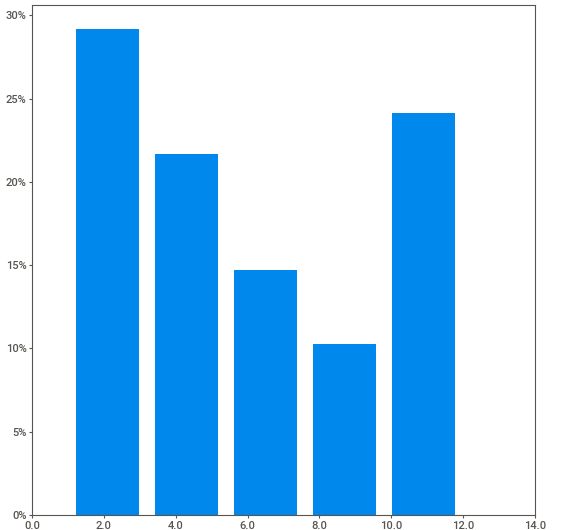
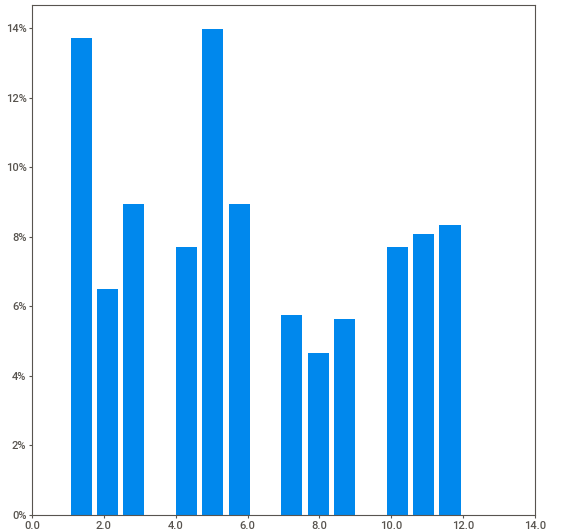
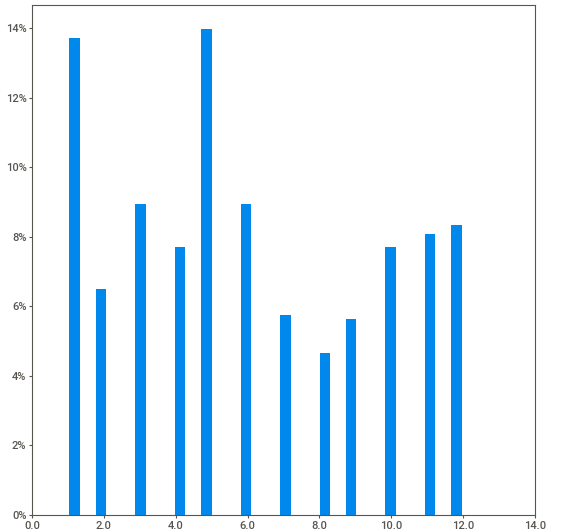
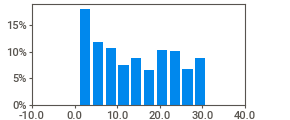
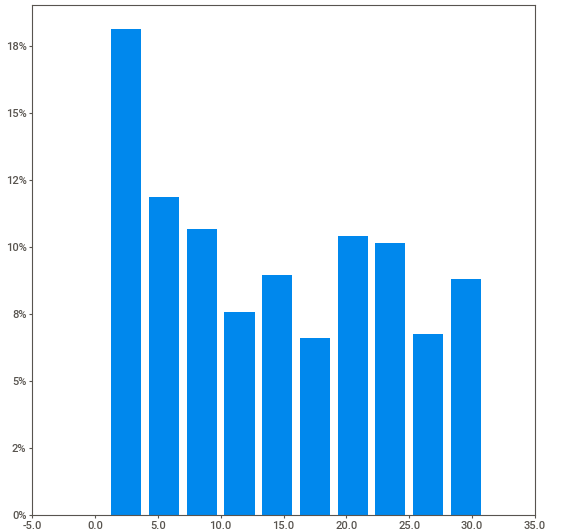
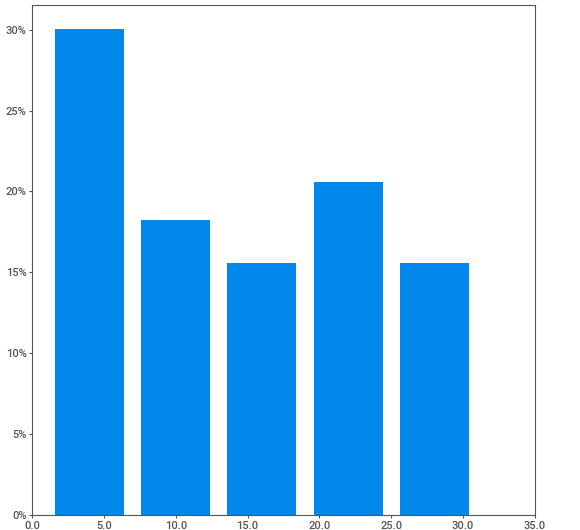
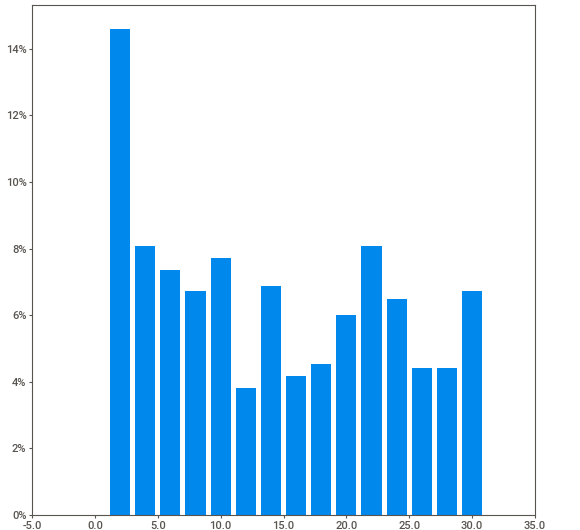
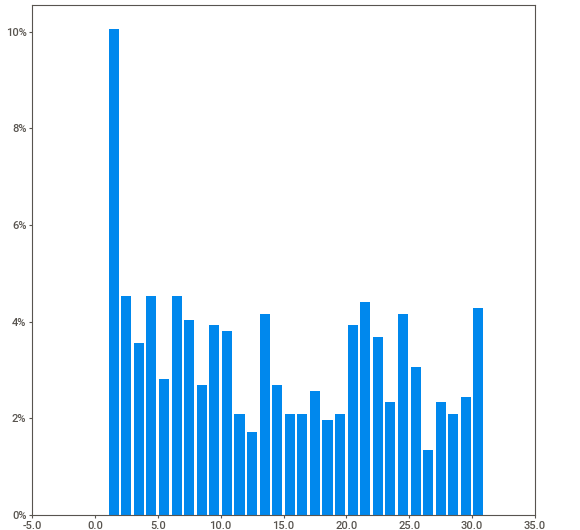
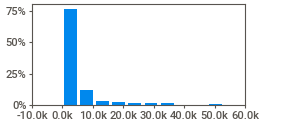
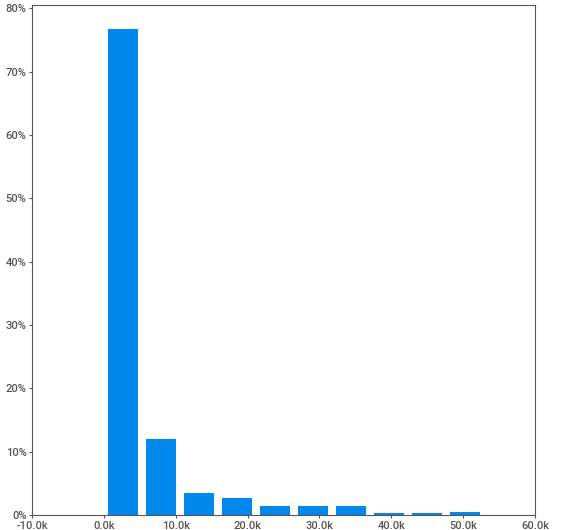
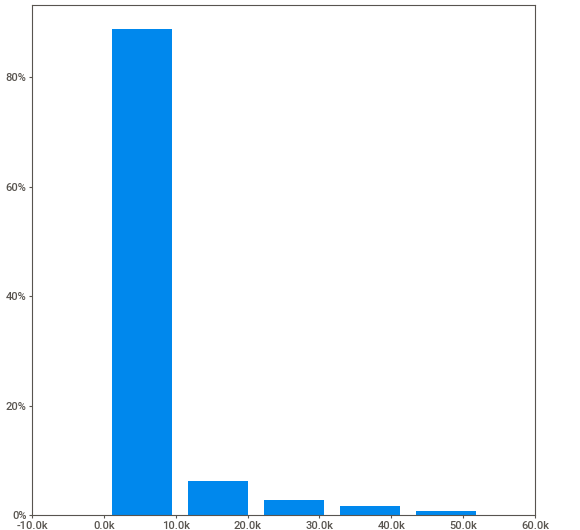
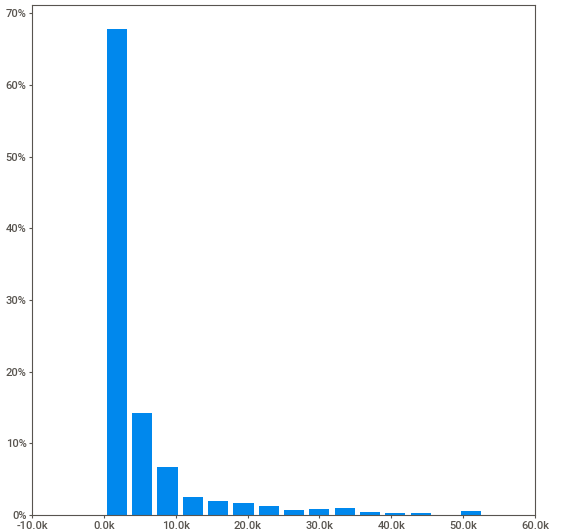
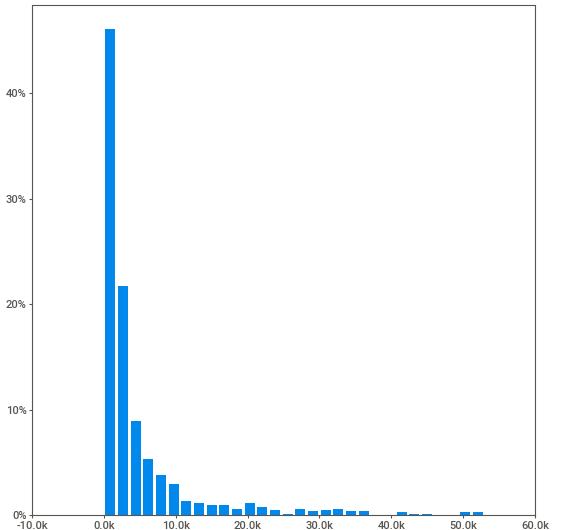
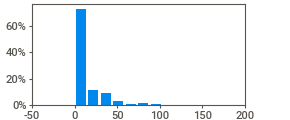
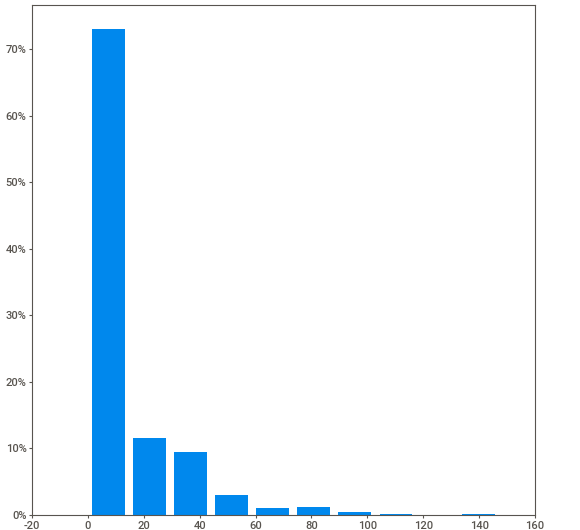
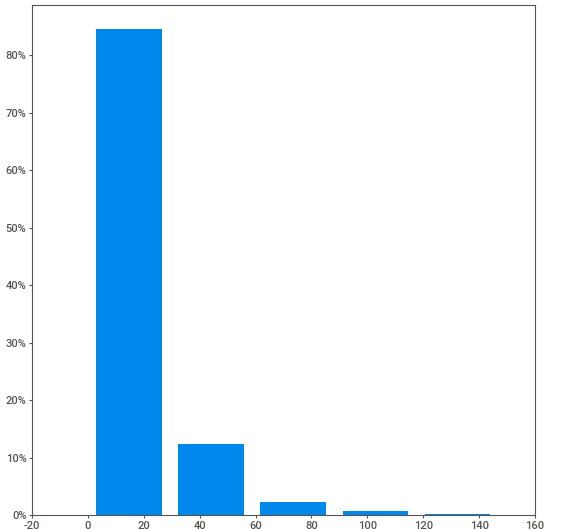
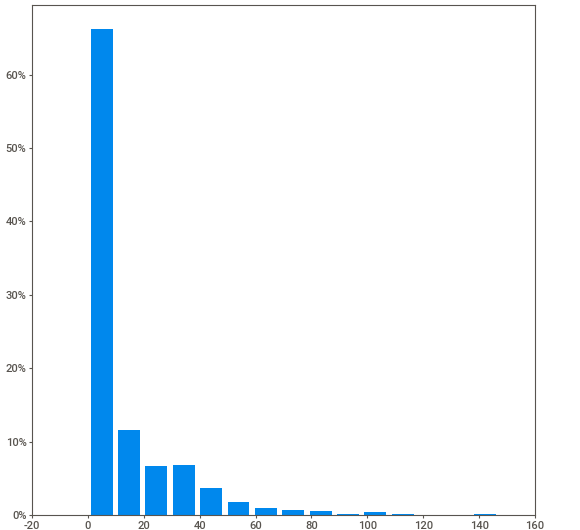
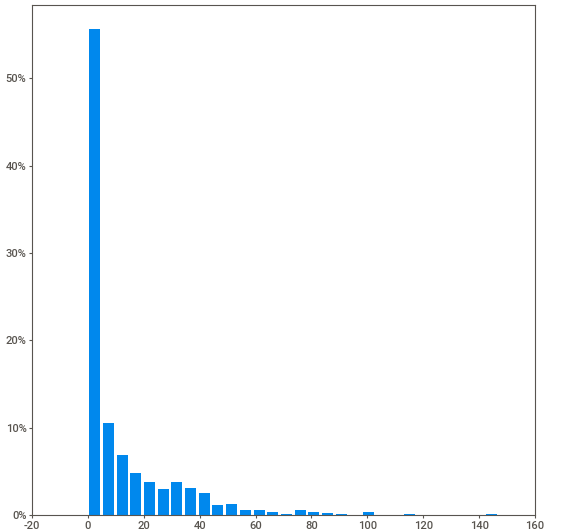
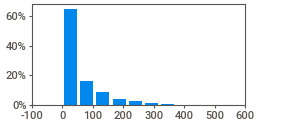
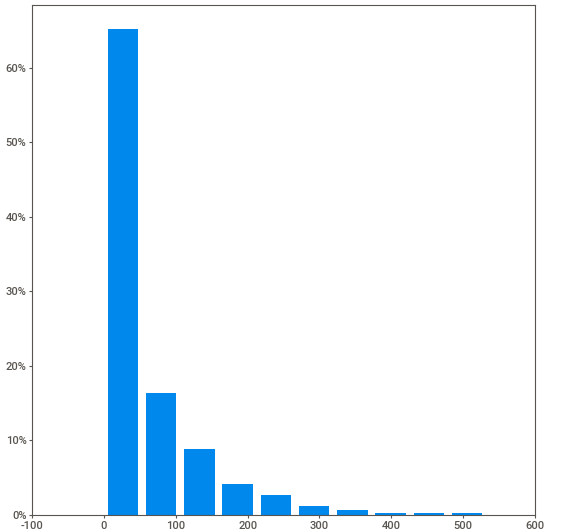
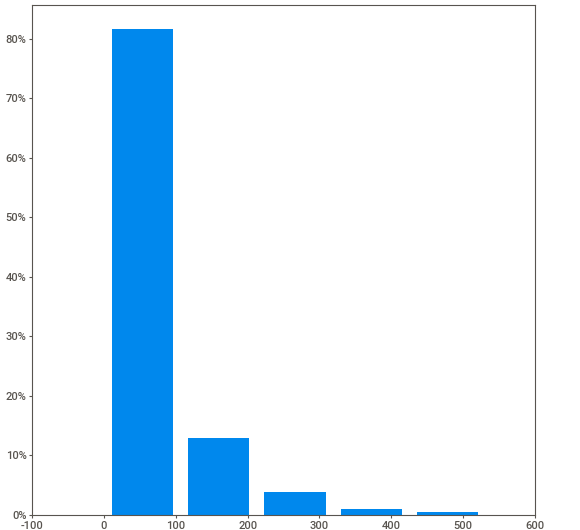
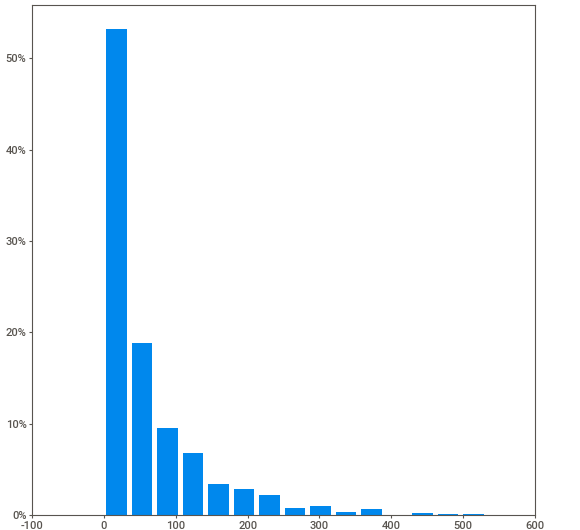
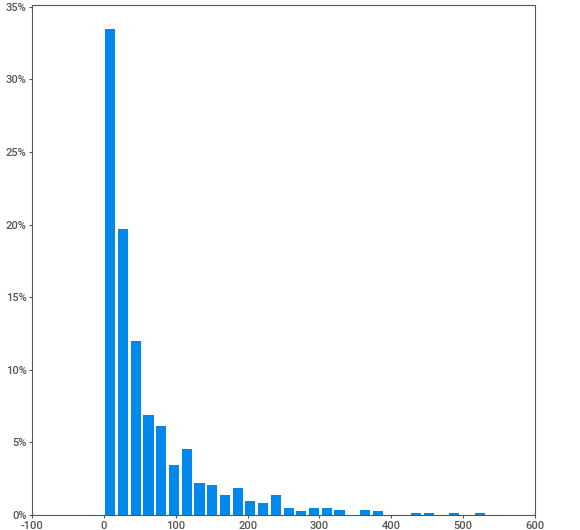
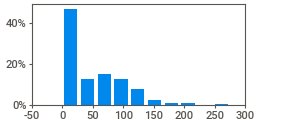
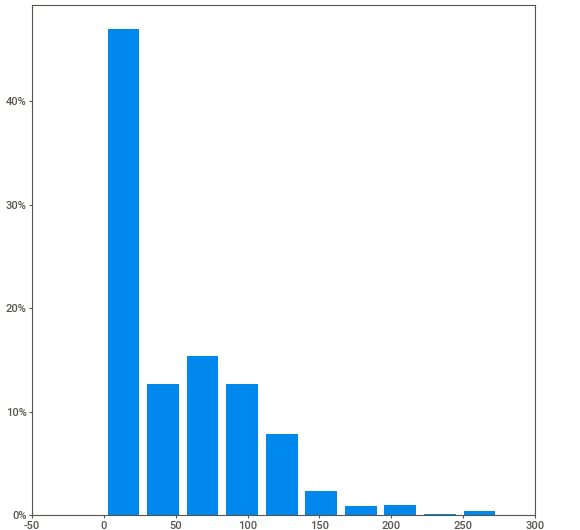
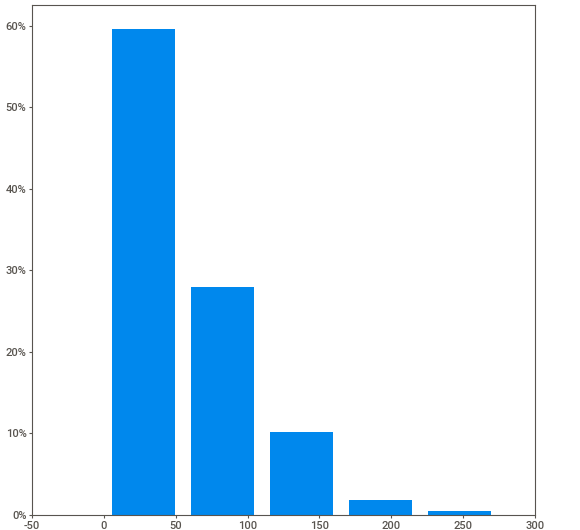
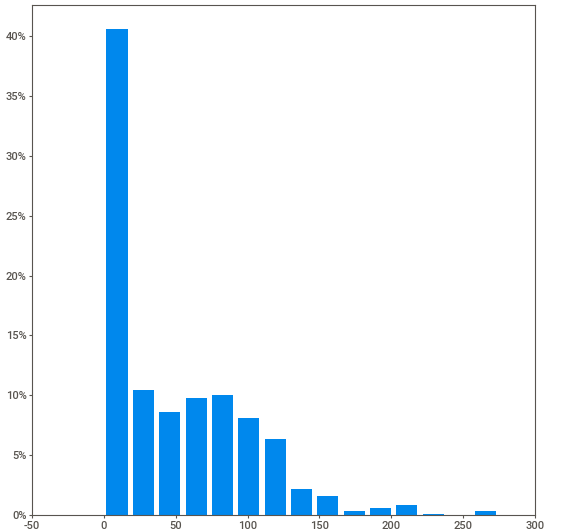
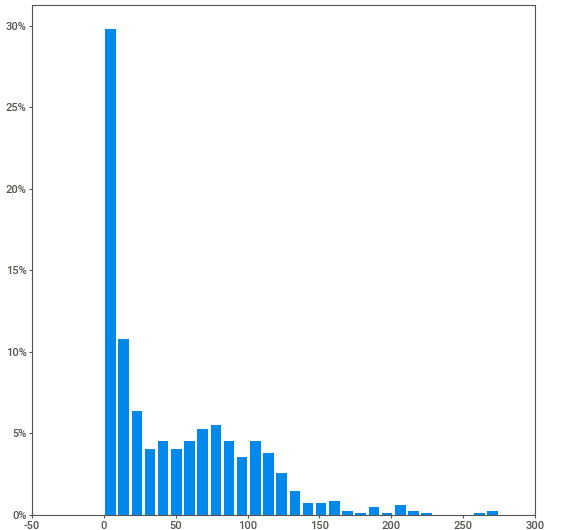
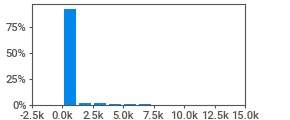
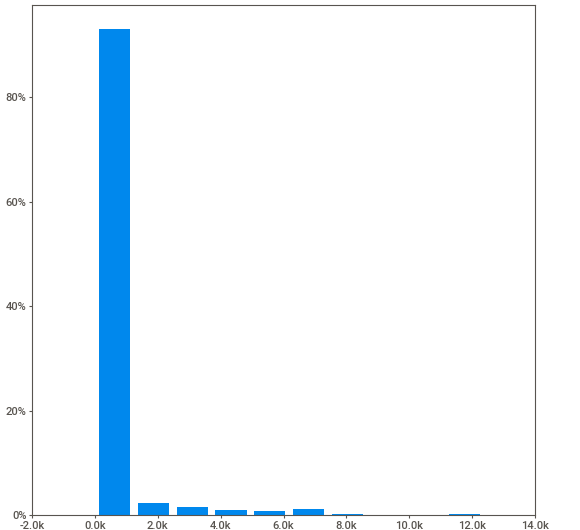
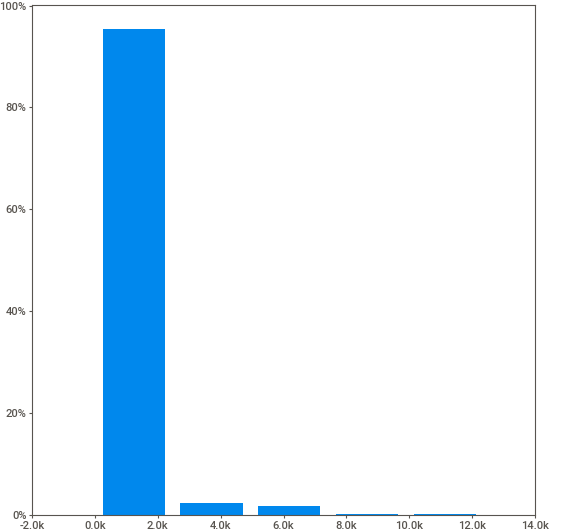
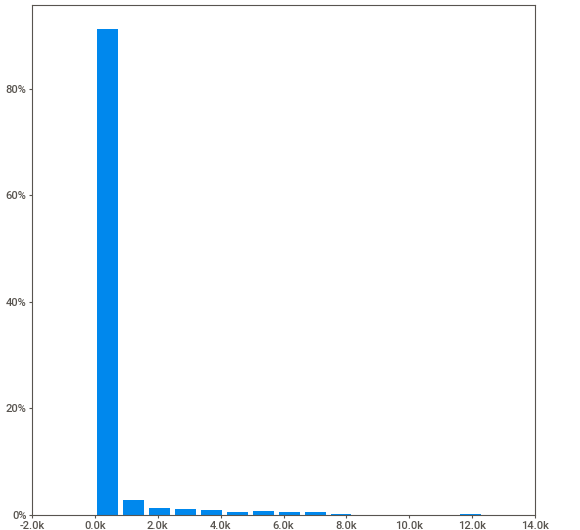
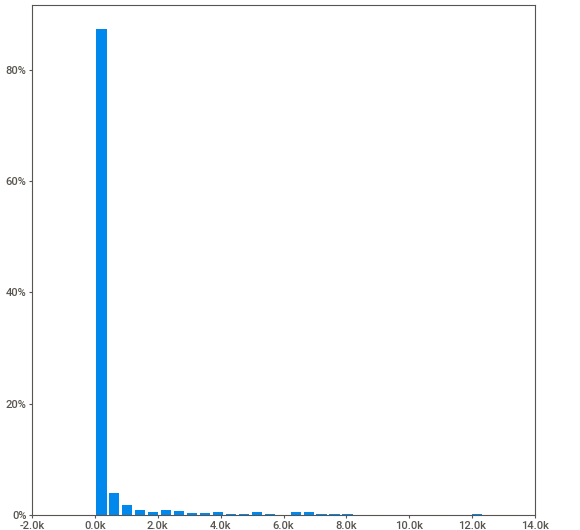
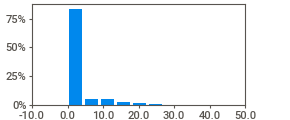
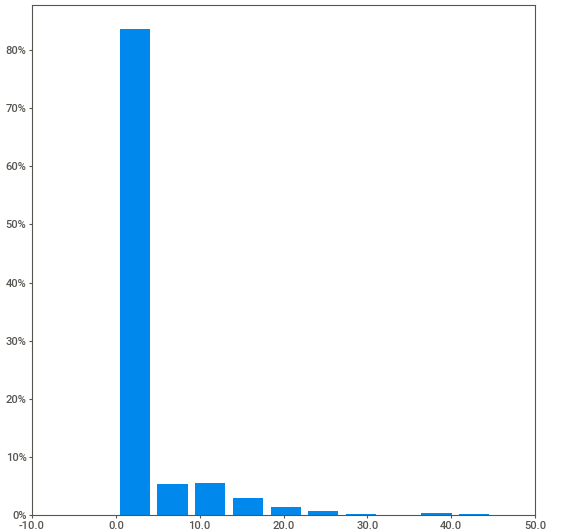
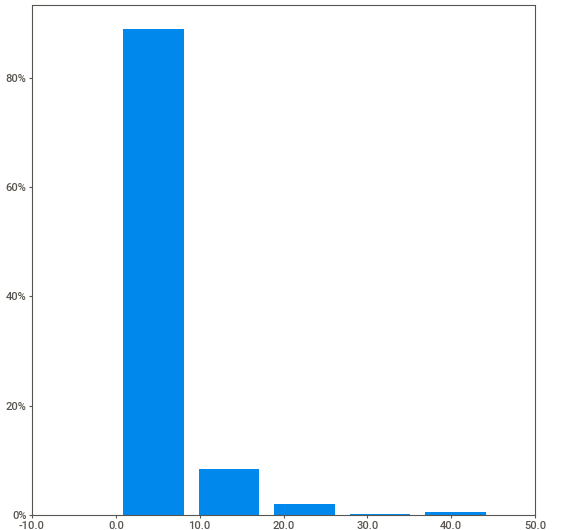
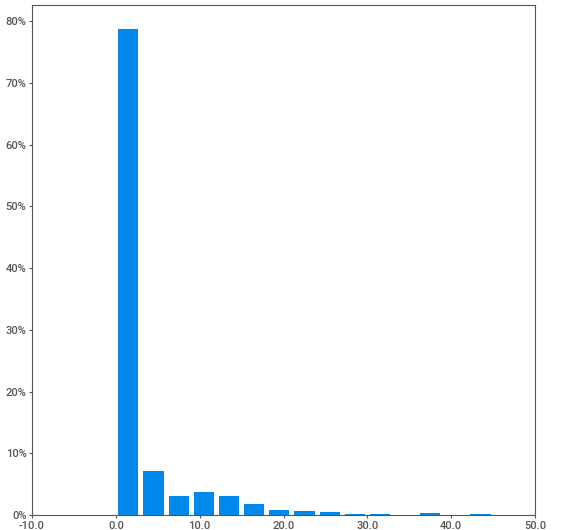
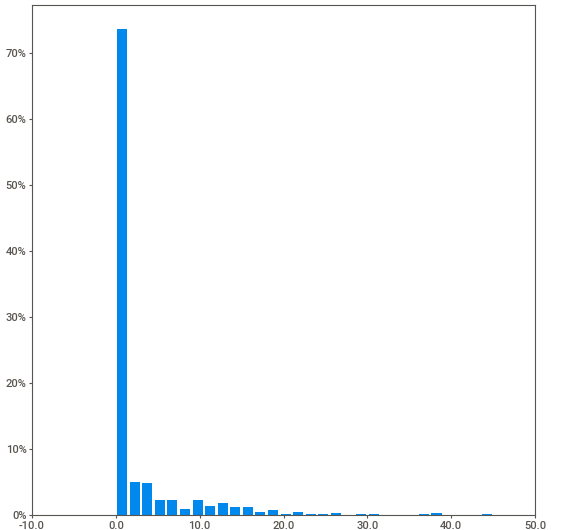
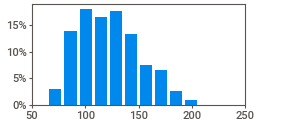
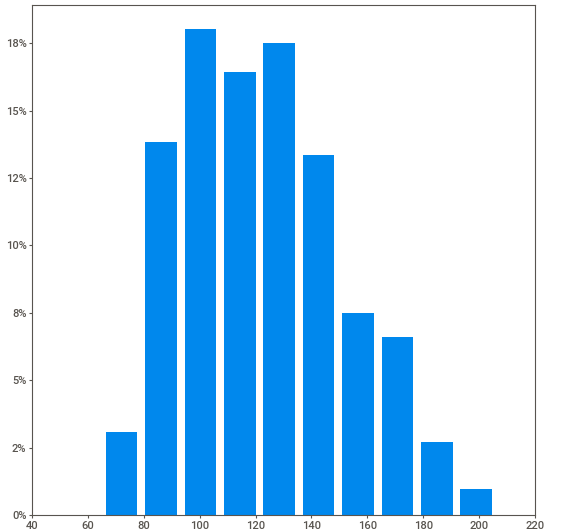
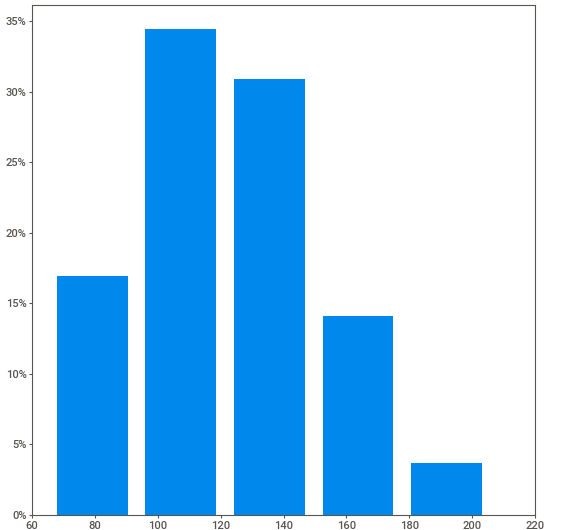
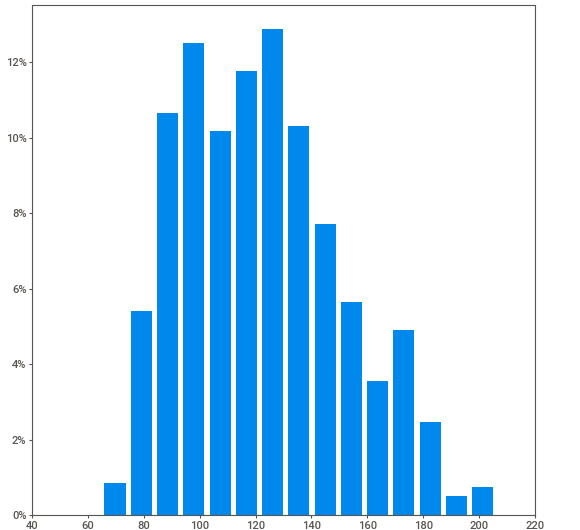
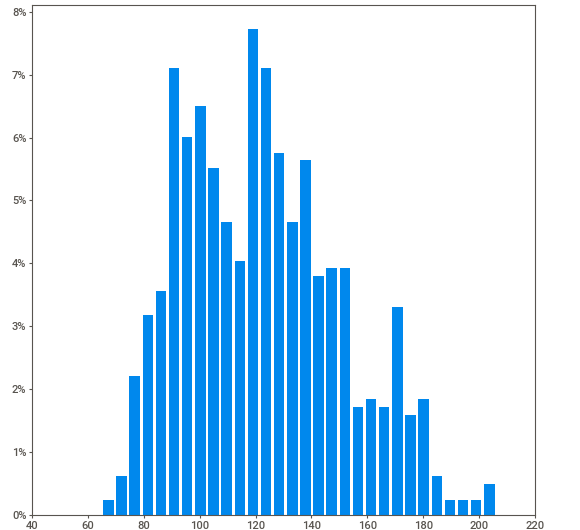
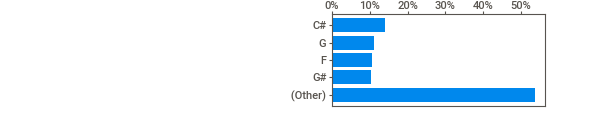
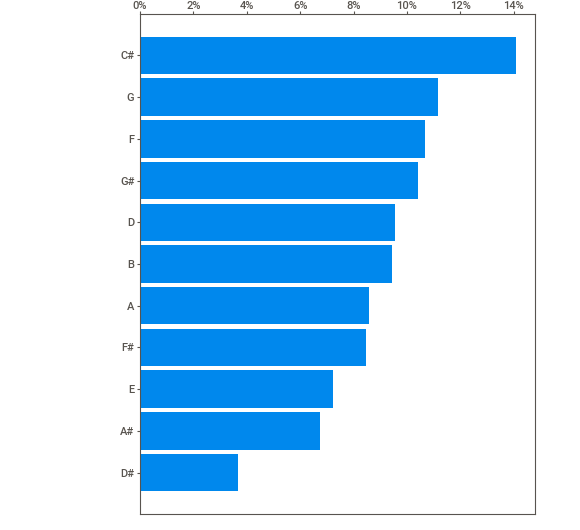
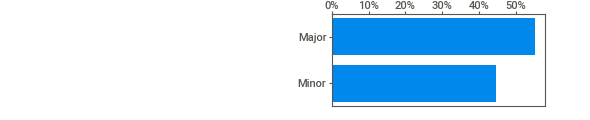
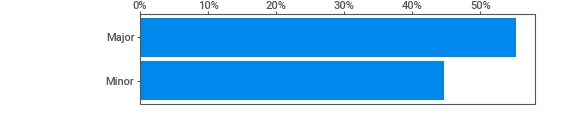
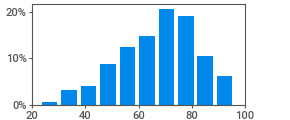
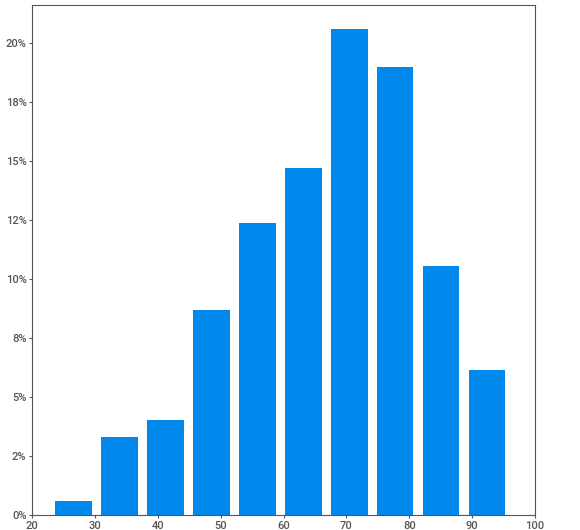
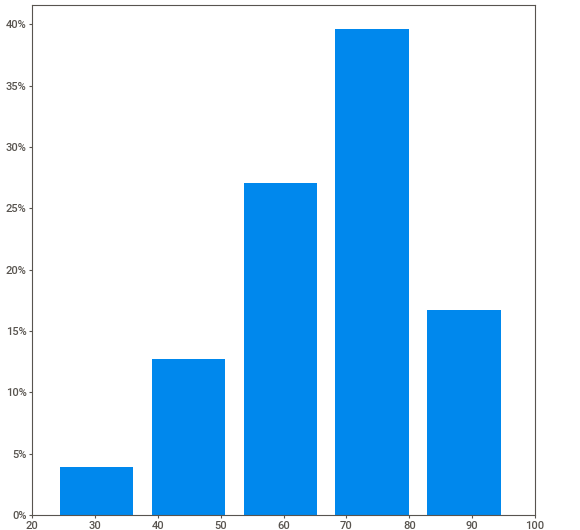
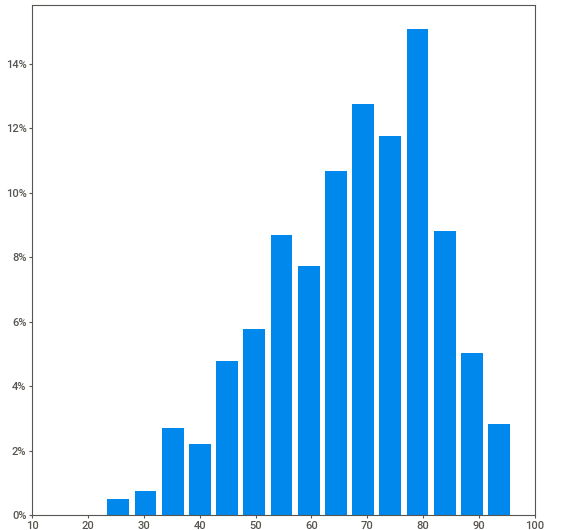
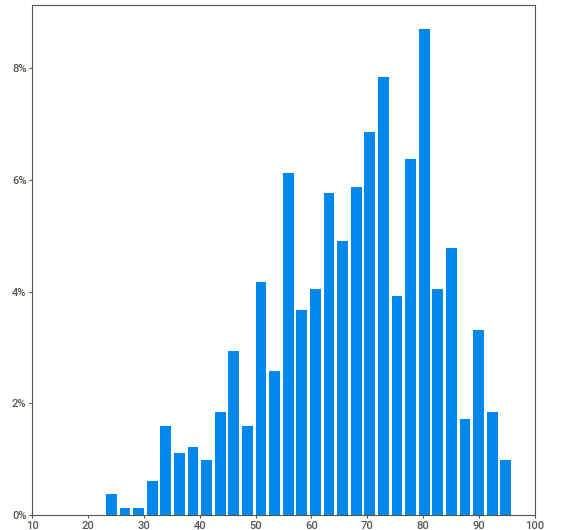
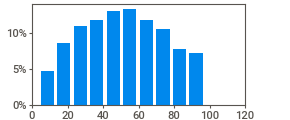
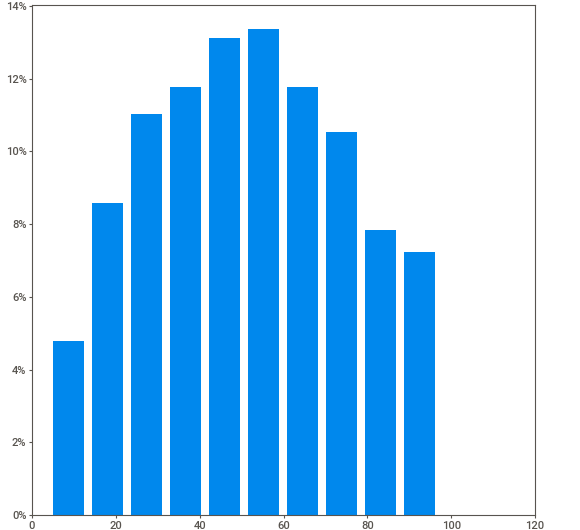
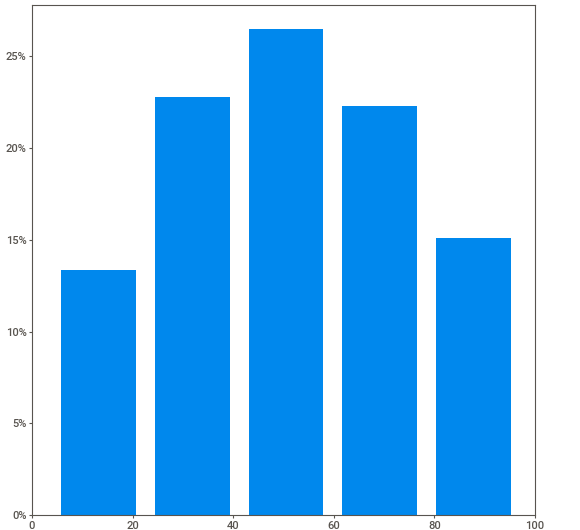
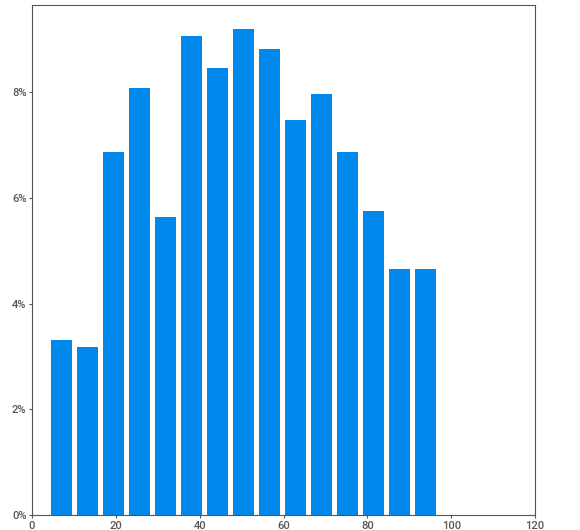
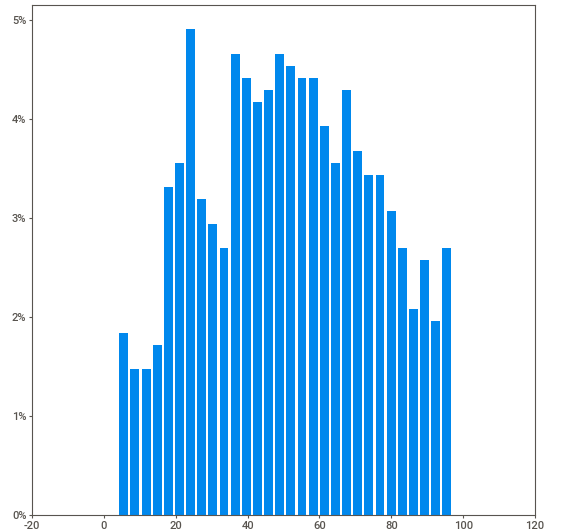
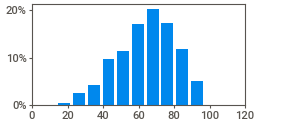
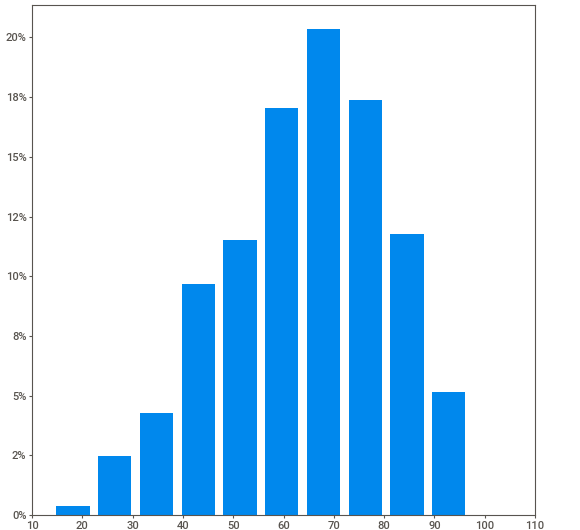
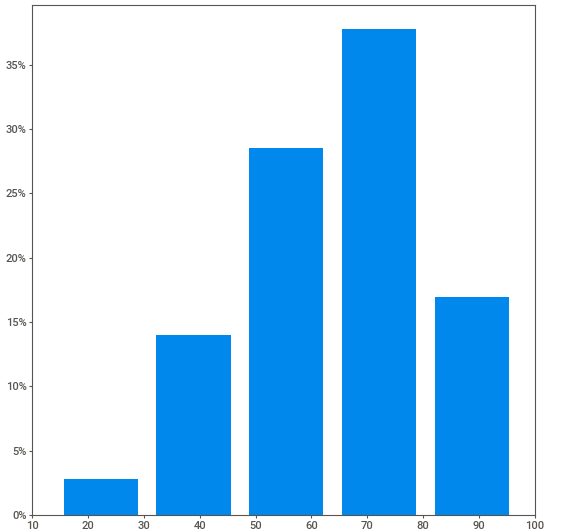
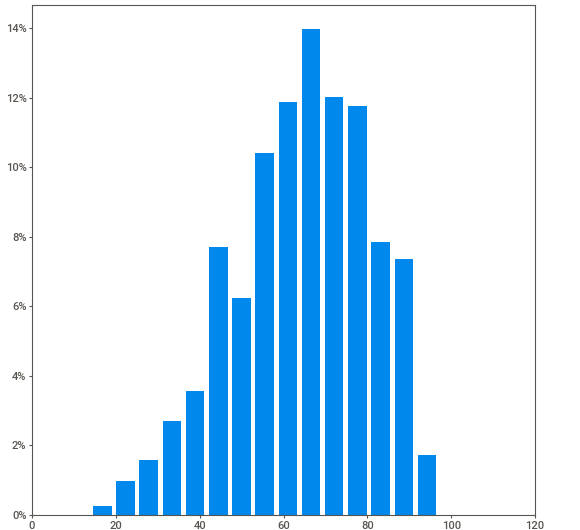
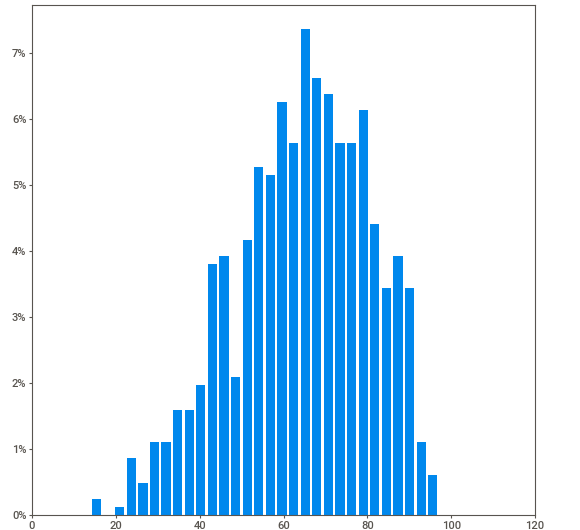
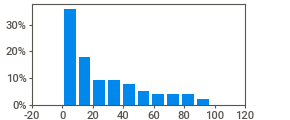
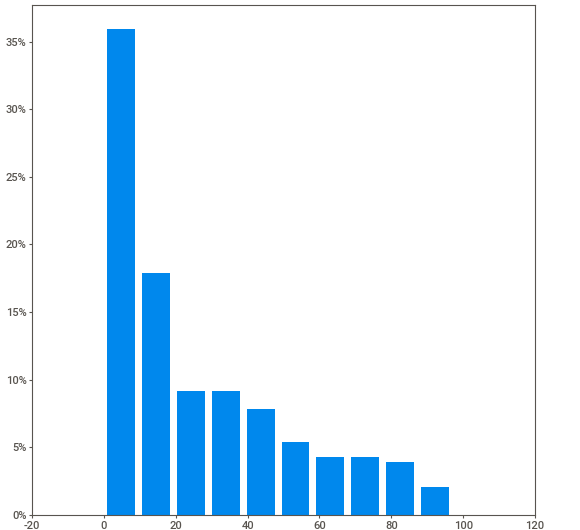
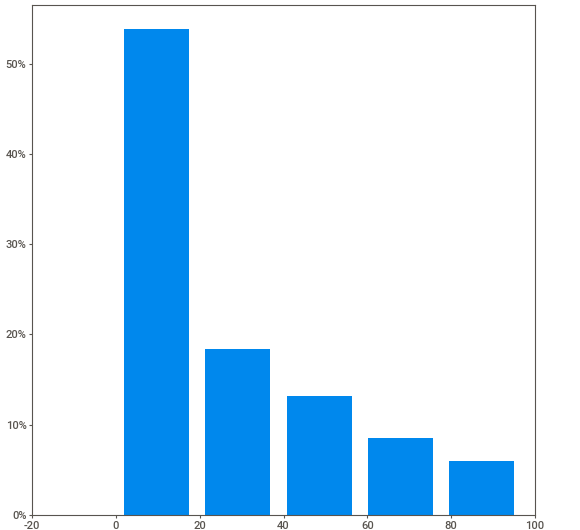
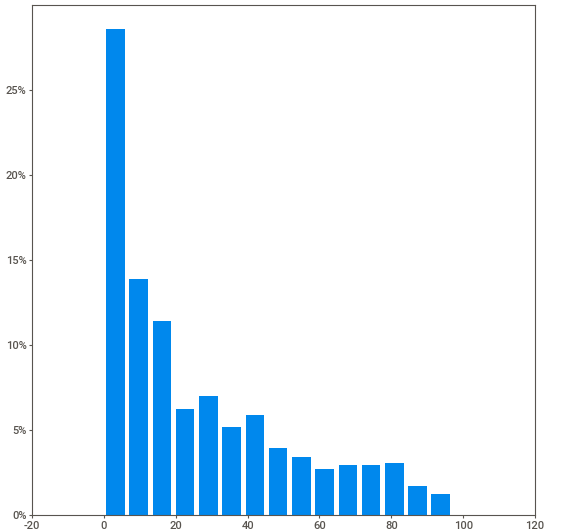
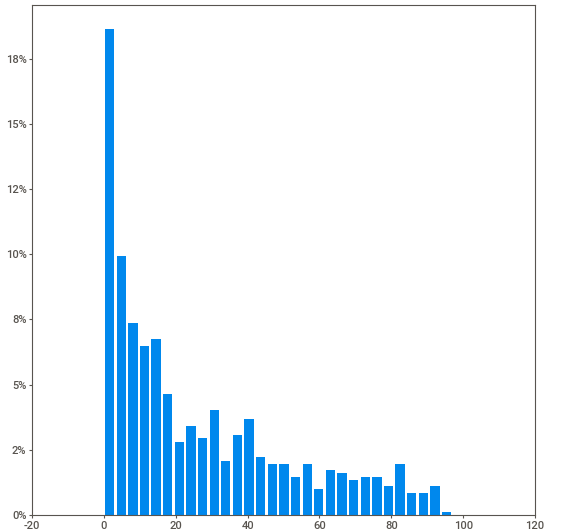
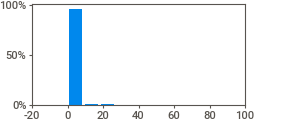
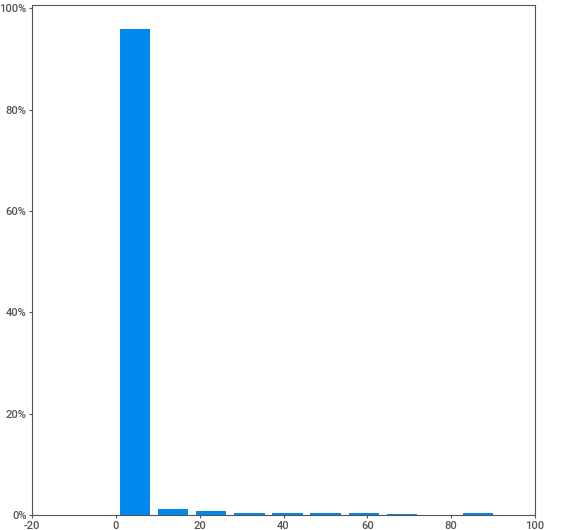
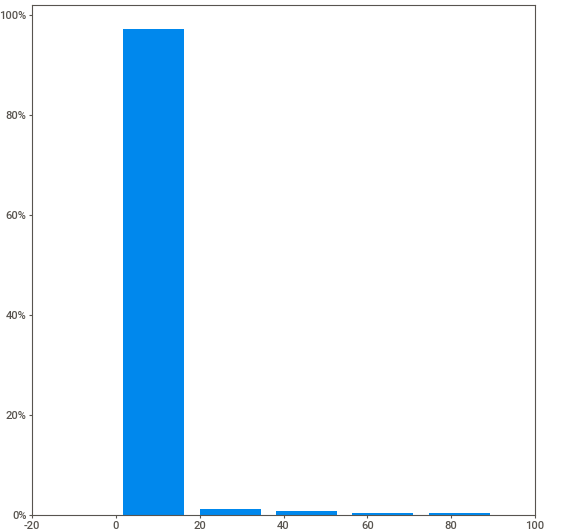
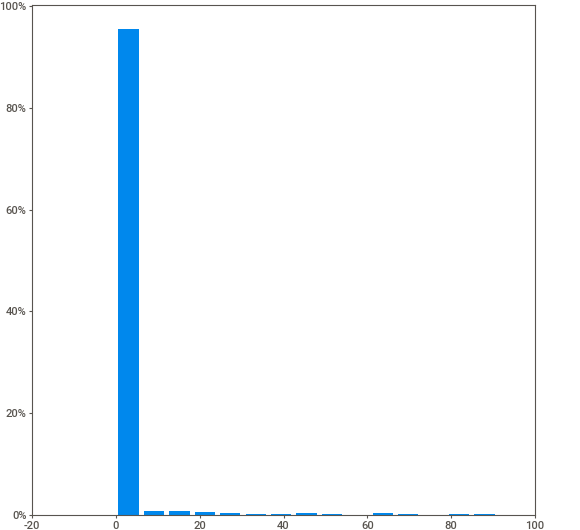
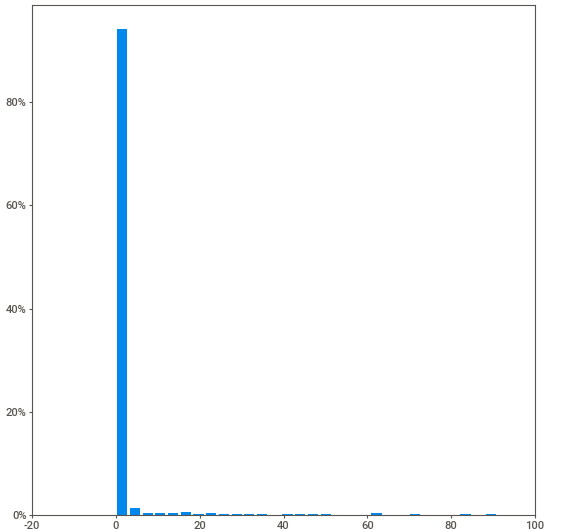
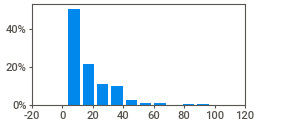
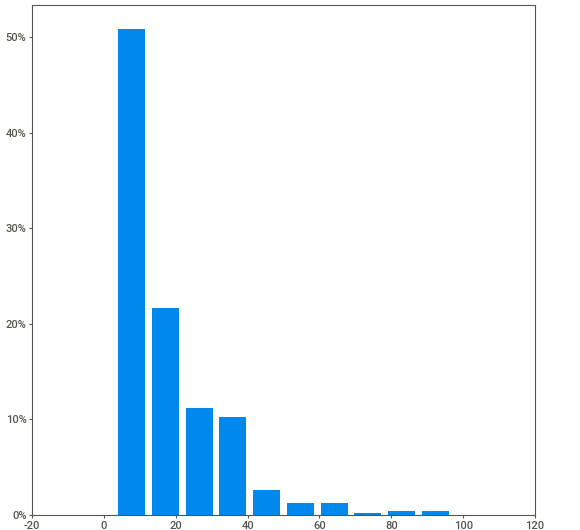
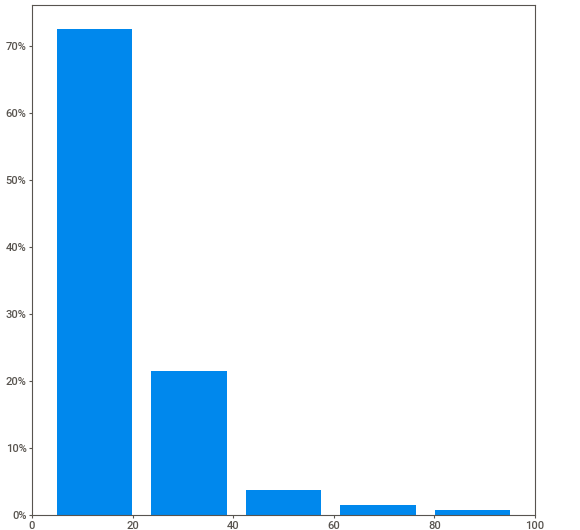
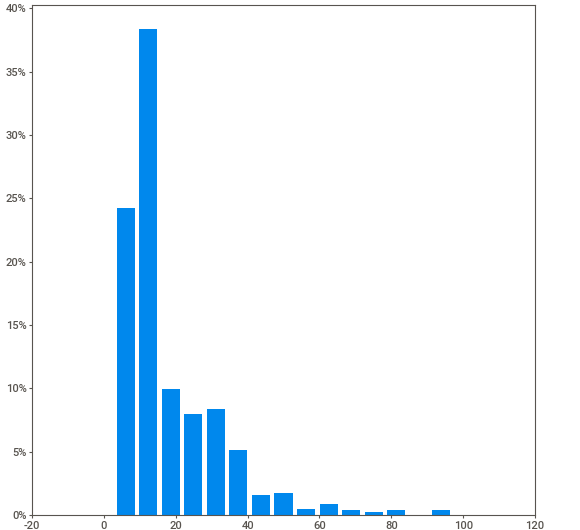
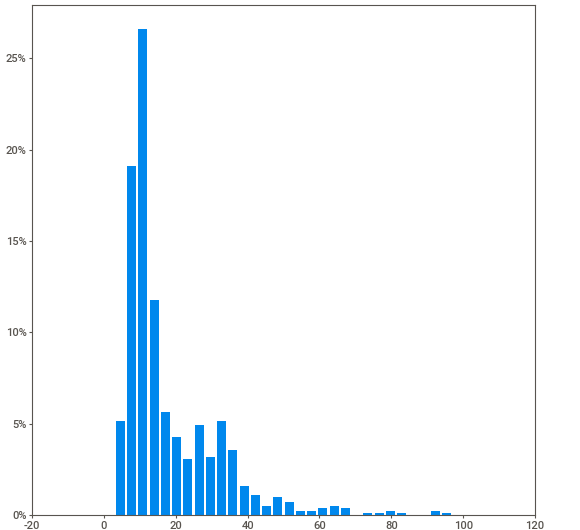
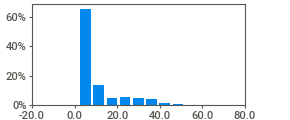
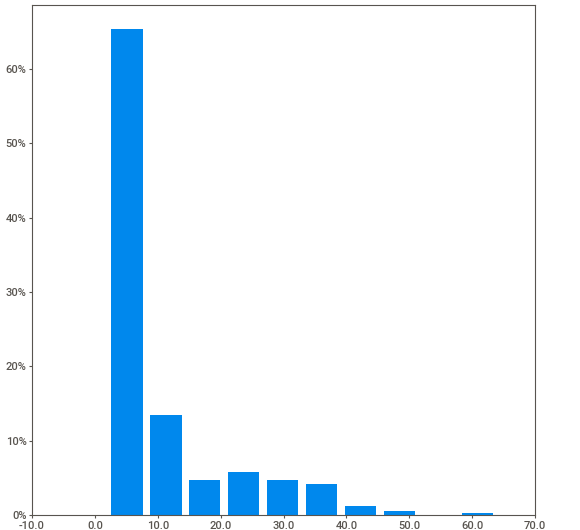
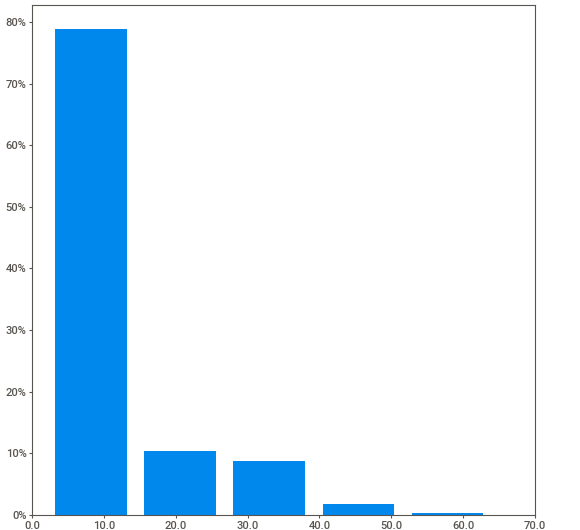
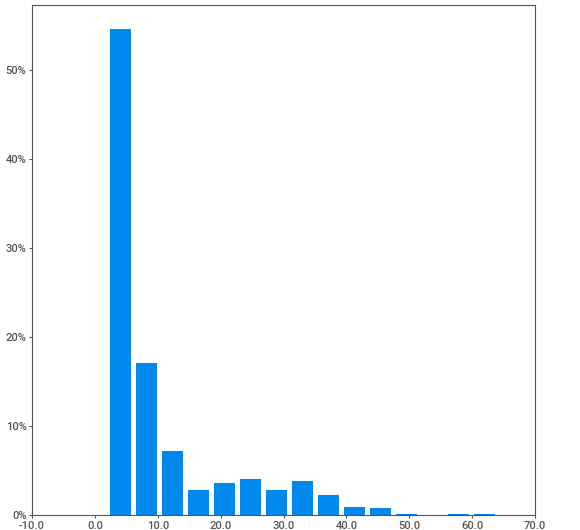
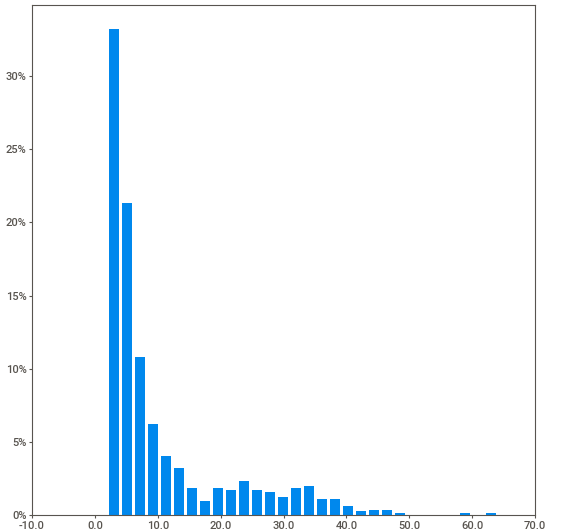
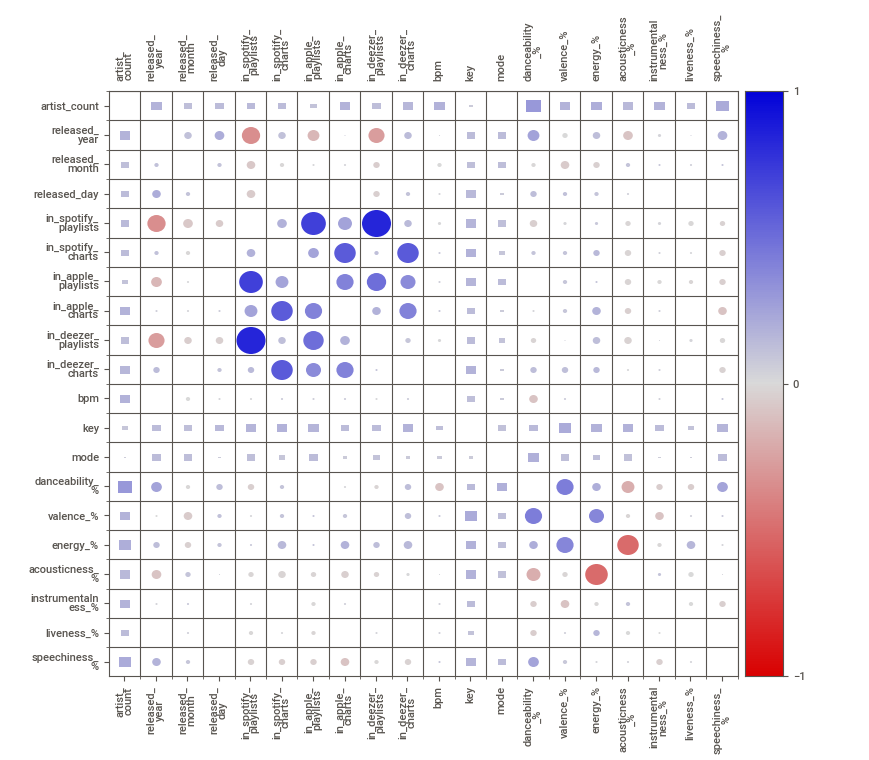
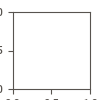

In [ ]:
# La función advert_report.show_notebook en Sweetviz muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter.

# Parámetros:

# layout: ajusta el diseño ( 'widescreen' o 'full screen' )
# w y h: ajusta el ancho y alto en píxeles
# scale: ajusta el tamaño (0.9 = 90% de la resolución original)
advert_report.show_notebook(layout='widescreen', w=1500, h=500, scale=0.9)

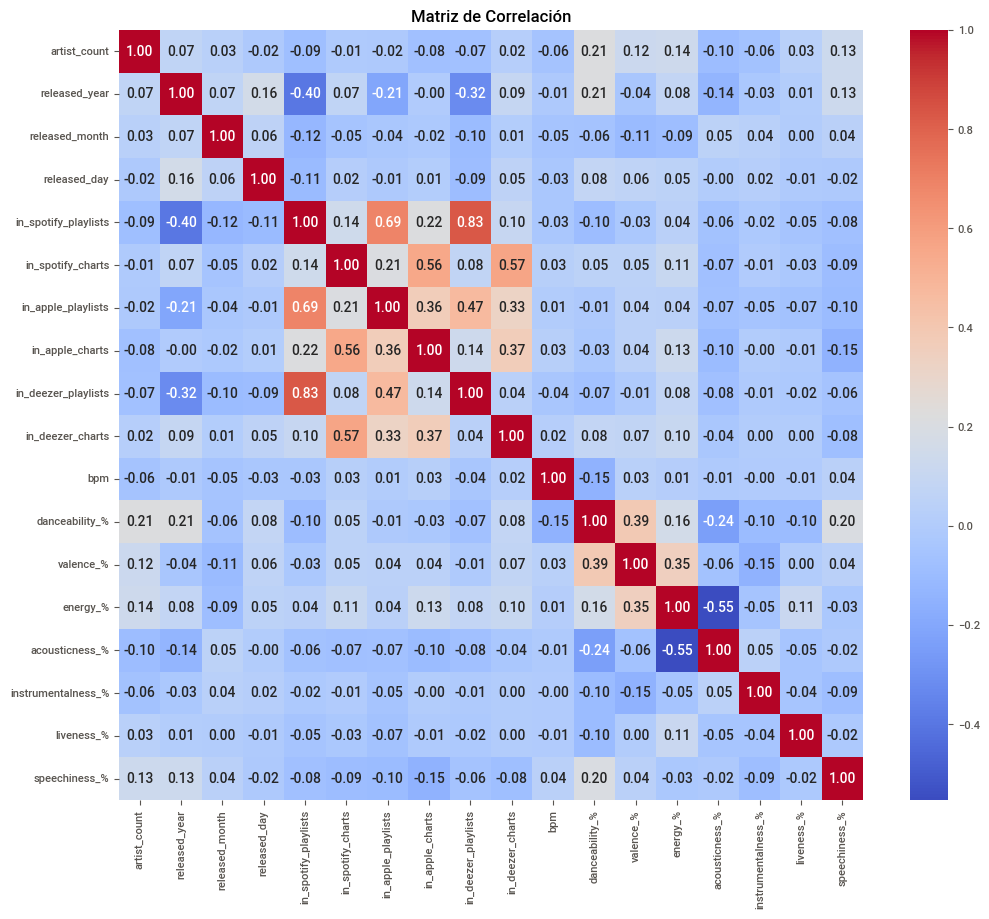

In [65]:
#@title Seleccionar solo las columnas numéricas del DataFrame
numeric_cols = spotify_df_.select_dtypes(include=['number'])

# Calcular la matriz de correlación
conf_matrix = numeric_cols.corr()

# Mostrar la matriz de correlación
# conf_matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [68]:
lista_carac_select = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
'in_deezer_playlists', 'in_deezer_charts', 'streams', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%']


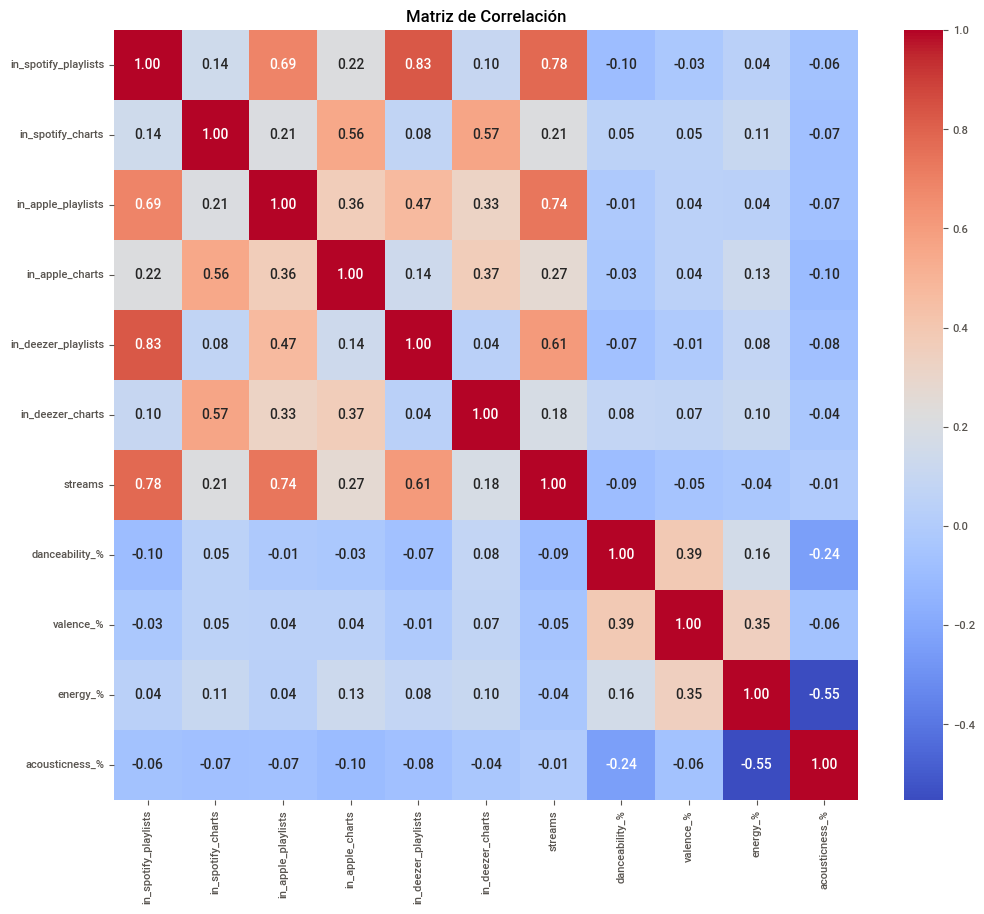

In [69]:
# Seleccionar solo las columnas numéricas del DataFrame
numeric_cols = spotify_df_[lista_carac_select]

# Calcular la matriz de correlación
conf_matrix = numeric_cols.corr()

# Mostrar la matriz de correlación
# conf_matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [20]:
# Almacenamos la base de datos limpia en un archivo CSV
spotify_df_.to_csv(path + 'spotify-2023-limpio.csv', sep=',', encoding='latin-1', index=False) # Guardamos la base de datos limpia en un archivo CSV